# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Brightspace.

Your code and analysis is like a story that awaits to be read, make it a nice story please. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Sunday, 1 March, 2020, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The problem and data come from an animal shelter concerned with animal welfare and reducing the risk of animal death. The shelter wants to use the data collected about their animals to build a data analytics solution for death risk prediction to help them in their planning towards improving the welfare of the animals they shelter. The shelter collects some data for each animal they take in (columns in the dataset with keyword "intake") and also records the status of each animal when it left the shelter (columns in the dataset with keyword "outcome").
The target variable to predict is a binary variable called **binary_outcome**. For this variable, the value “1” indicates that after intake, the animal outcome was negative, e.g., "death", while the value "0" indicates that the animal outcome was a positive one, e.g., was adopted or returned to the owner.
The dataset we work with is a sample of the data released by this shelter:
https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

Each student will work with a different subset of the data. The CSV file is named using the format: **AnimalWelfareRisk-[your-student-number].csv**, e.g., **AnimalWelfareRisk-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40].



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process.
    - Check how many rows and columns your CSV has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuos and which ones as categorical types). 
    - Drop duplicate rows and columns, if any.
    - Drop constant columns, if any.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings.
    - Save the initial discussion of your findings into a single data quality report PDF file.                     The PDF report should focus on the key issues identified in the data and discuss potential strategies              to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. 

(2). [30] Prepare a data quality plan for the cleaned CSV file. 
    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:
    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

# Convert the features to their appropriate data types

In [2]:
#Import the required packages
#Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#import seaborn
import seaborn as sns

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

import matplotlib.patches as mpatches

In [2]:
# Reading dataframe
df = pd.read_csv('AnimalWelfareRisk-19200491.csv')

***- Check how many rows and columns your CSV has.***

In [3]:
# Check the number of rows and columns
df.shape

(1000, 22)

***- Print the first and the last 5 rows.***

In [4]:
# print the first 5 rows
df.head(5)

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,...,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
0,A668972,Mufasa,12/12/2013 12:59:00 PM,12/12/2013 12:59:00 PM,9220 Ih 35 in Austin (TX),Public Assist,Normal,Dog,Intact Male,4 years,...,Mufasa,12/30/2013 02:40:00 PM,12/30/2013 02:40:00 PM,12/12/2009,Dog,Intact Male,4 years,Mastiff Mix,Black,1.0
1,A756041,NaN,08/13/2017 11:18:00 AM,08/13/2017 11:18:00 AM,8504 Flagstone in Austin (TX),Stray,Normal,Cat,Intact Female,2 months,...,NaN,08/17/2017 05:29:00 PM,08/17/2017 05:29:00 PM,05/29/2017,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Black,0.0
2,A791266,Marvin,03/23/2019 03:22:00 PM,03/23/2019 03:22:00 PM,Creedmoor (TX),Owner Surrender,Normal,Cat,Neutered Male,5 years,...,Marvin,04/12/2019 04:10:00 PM,04/12/2019 04:10:00 PM,03/23/2014,Cat,Neutered Male,5 years,Domestic Shorthair Mix,Black/White,0.0
3,A782709,Xena,10/20/2018 09:36:00 AM,10/20/2018 09:36:00 AM,Decker Lake Dr And 973 in Travis (TX),Stray,Injured,Dog,Intact Female,5 years,...,Xena,10/22/2018 12:30:00 PM,10/22/2018 12:30:00 PM,10/20/2013,Dog,Intact Female,5 years,Siberian Husky Mix,Gray/White,0.0
4,A699922,Texas,04/04/2015 12:52:00 PM,04/04/2015 12:52:00 PM,11330 Farrah Ln in Austin (TX),Stray,Normal,Cat,Neutered Male,2 years,...,Texas,04/07/2015 06:22:00 PM,04/07/2015 06:22:00 PM,04/04/2013,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby,0.0


In [5]:
# print the last 5 rows
df.tail(5)

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,...,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
995,A746575,Hercules,04/05/2017 08:55:00 AM,04/05/2017 08:55:00 AM,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,1 year,...,Hercules,05/31/2017 12:09:00 PM,05/31/2017 12:09:00 PM,10/05/2015,Dog,Neutered Male,1 year,Boxer,Brown Brindle,0.0
996,A734250,NaN,09/03/2016 12:04:00 PM,09/03/2016 12:04:00 PM,2815 Hwy 71 in Austin (TX),Public Assist,Normal,Other,Intact Female,8 months,...,NaN,09/11/2016 03:57:00 PM,09/11/2016 03:57:00 PM,01/03/2016,Other,Intact Female,8 months,Rabbit Sh Mix,Black,0.0
997,A771788,NaN,05/10/2018 09:09:00 AM,05/10/2018 09:09:00 AM,Manor (TX),Owner Surrender,Nursing,Other,Unknown,2 days,...,NaN,05/10/2018 11:34:00 AM,05/10/2018 11:34:00 AM,05/08/2018,Other,Unknown,2 days,Rabbit Sh,White,0.0
998,A697000,Boone,02/16/2015 12:05:00 PM,02/16/2015 12:05:00 PM,Davis Ln & Fulbright Ln in Austin (TX),Stray,Normal,Dog,Neutered Male,6 years,...,Boone,02/16/2015 01:24:00 PM,02/16/2015 01:24:00 PM,02/16/2009,Dog,Neutered Male,6 years,English Springer Spaniel Mix,Liver/White,0.0
999,A795759,NaN,05/24/2019 12:18:00 PM,05/24/2019 12:18:00 PM,5617 Jfk Drive in Austin (TX),Stray,Sick,Dog,Intact Female,2 months,...,NaN,05/25/2019 08:22:00 AM,05/25/2019 08:22:00 AM,03/09/2019,Dog,Intact Female,2 months,Chihuahua Shorthair,Tan/White,1.0


Check Original Feature Type

In [6]:
df.dtypes

Animal ID               object
Name_Intake             object
DateTime_Intake         object
MonthYear_Intake        object
Found Location          object
Intake Type             object
Intake Condition        object
Animal Type_Intake      object
Sex upon Intake         object
Age upon Intake         object
Breed_Intake            object
Color_Intake            object
Name_Outcome            object
DateTime_Outcome        object
MonthYear_Outcome       object
Date of Birth           object
Animal Type_Outcome     object
Sex upon Outcome        object
Age upon Outcome        object
Breed_Outcome           object
Color_Outcome           object
binary_outcome         float64
dtype: object

***- Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
continuos and which ones as categorical types).***

As the dataframe showed above, four units were used to describe the 'Age Intake' and the 'Age Outcome', this can increase the difficulty while comparing ages. Hence, it is better to use a common unit to present the animals' age.
To achieve an accurate result, we decide to used 'DateTime_Intake/Outcome' minus 'Date of Birth'.

In [7]:
# In order to get the accurate age(in days), we convert 'MonthYear_Intake', 'MonthYear_Intake', 'MonthYear_Intake'
# 'MonthYear_Intake', and 'MonthYear_Intake' into datetime64
df['MonthYear_Intake'] = df['MonthYear_Intake'].astype('datetime64')
df['MonthYear_Outcome'] = df['MonthYear_Outcome'].astype('datetime64')
df['Date of Birth'] = df['Date of Birth'].astype('datetime64')
df['DateTime_Intake'] = df['DateTime_Intake'].astype('datetime64')
df['DateTime_Outcome'] = df['DateTime_Outcome'].astype('datetime64')

# convert the column 'Age upon Intake'
df['Age upon Intake'] = (df['DateTime_Intake'] - df['Date of Birth']).dt.days 

# convert the column 'Age upon Outcome'
df['Age upon Outcome'] =(df['DateTime_Outcome'] - df['Date of Birth']).dt.days

Then we first convert ofter 'object' type and 'float64' type features into 'category' type, as the meaning of they cannot be presented using numbers.

Also, we extracted the month and year information from the 'datetime64' feature to help further analyze. Even though the month and year information look like a number, but each number presents a category. Hence the extracted information should be 'category' feature.

In [8]:
# convert object type feature into catagory
category_columns = df.select_dtypes(['object'] )
for elem in category_columns:
     df[elem] = df[elem].astype('category')

# convert float64 type feature into catagory     
float_columns = df.select_dtypes(['float64'] )
for elem in float_columns:
     df[elem] = df[elem].astype('category')
        
# convert dateime type feature into catagory
datetime_columns = df.select_dtypes( ['datetime64[ns]'])
for elem in datetime_columns:
    df[elem+"_month"]=df[elem].dt.month
    df[elem+"_year"]=df[elem].dt.year
    
    df[elem+"_month"]=df[elem+"_month"].astype('category')
    df[elem+"_year"]=df[elem+"_year"].astype('category')
    
    df.drop([elem], axis=1,inplace=True)
    
# Animal ID  should be a 'object' feature as it is a unique identifier
df['Animal ID'] = df['Animal ID'].astype('object')

Check features type, 'Age upon Intake' and 'Age upon Outcome' should be continuse and other features should be catagory

In [9]:
df.dtypes

Animal ID                    object
Name_Intake                category
Found Location             category
Intake Type                category
Intake Condition           category
Animal Type_Intake         category
Sex upon Intake            category
Age upon Intake               int64
Breed_Intake               category
Color_Intake               category
Name_Outcome               category
Animal Type_Outcome        category
Sex upon Outcome           category
Age upon Outcome              int64
Breed_Outcome              category
Color_Outcome              category
binary_outcome             category
DateTime_Intake_month      category
DateTime_Intake_year       category
MonthYear_Intake_month     category
MonthYear_Intake_year      category
DateTime_Outcome_month     category
DateTime_Outcome_year      category
MonthYear_Outcome_month    category
MonthYear_Outcome_year     category
Date of Birth_month        category
Date of Birth_year         category
dtype: object

***- Drop duplicate rows and columns, if any.*** 
***- Drop constant columns, if any.***

In [10]:
# Drop duplicate columns(column:'MonthYear_Intake'&'MonthYear_Intake' are same, 'DateTime_Intake'&'DateTime_Outcome' are same, 
# 'Color_Intake'&'Color_Outcome' are same, 'Breed Intake'& 'Breed Outcome','Animal Type_Intake'&'Animal Type_Outcome' are same, 'Name_Intake'&'Name_Outcome' are same). 
# Hence, we need to drop five column in total.

df=df.T.drop_duplicates().T

Try to find the duplicate rows by creating a new column. After test, there is no constant columns, hence we dont need to drop anything.

In [11]:
# create a new column to find duplicate rows
df["is_duplicate"]= df.duplicated()

# drop the duplicate the row
df = df.drop(df[df['is_duplicate'] == True].index)

# we can now drop the new created column "is_duplicate" as we don't need it anymore
df = df.drop('is_duplicate',1)

Because after drop all duplicate columns and rows, the feature type convert back to origin. So we need to re-run the converstion prcess.

In [12]:
df['Age upon Intake'] = df['Age upon Intake'].astype('int64')
df['Age upon Outcome'] = df['Age upon Outcome'].astype('int64')

category_columns = df.select_dtypes(['object'] )

for elem in category_columns:
     df[elem] = df[elem].astype('category')

df['Animal ID'] = df['Animal ID'].astype('object')

In [13]:
df.dtypes

Animal ID                   object
Name_Intake               category
Found Location            category
Intake Type               category
Intake Condition          category
Animal Type_Intake        category
Sex upon Intake           category
Age upon Intake              int64
Breed_Intake              category
Color_Intake              category
Sex upon Outcome          category
Age upon Outcome             int64
binary_outcome            category
DateTime_Intake_month     category
DateTime_Intake_year      category
DateTime_Outcome_month    category
DateTime_Outcome_year     category
Date of Birth_month       category
Date of Birth_year        category
dtype: object

***Check logical integrity of data***

In [14]:
test_1 = df[['Sex upon Intake','Sex upon Outcome']][df['Sex upon Intake'] != df['Sex upon Outcome']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1.tail(60)

Number of rows failing the test:  397


,Sex upon Intake,Sex upon Outcome
860,Intact Female,Spayed Female
862,Intact Male,Neutered Male
863,Intact Male,Neutered Male
865,Intact Female,Spayed Female
866,Intact Female,Spayed Female
870,Intact Female,Spayed Female
873,Intact Female,Spayed Female
875,Intact Female,Spayed Female
877,Intact Male,Neutered Male
882,Intact Male,Neutered Male


In [15]:
# test 2
df[df['Age upon Intake'] > df['Age upon Outcome']]

,Animal ID,Name_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,Breed_Intake,Color_Intake,Sex upon Outcome,Age upon Outcome,binary_outcome,DateTime_Intake_month,DateTime_Intake_year,DateTime_Outcome_month,DateTime_Outcome_year,Date of Birth_month,Date of Birth_year
55,A778653,Apollonia,Travis (TX),Owner Surrender,Normal,Dog,Spayed Female,2325,Pit Bull Mix,Blue/White,Spayed Female,2319,0.0,12,2018,12,2018,8,2012
173,A726552,Dani,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,935,Pit Bull Mix,Tan,Spayed Female,927,0.0,12,2017,11,2017,5,2015
388,A657188,Tommy,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,5253,Domestic Shorthair Mix,Brown Tabby/White,Neutered Male,5241,0.0,11,2013,10,2013,6,1999
666,A663868,*Capers,10911 Maha Loop in Austin (TX),Stray,Normal,Dog,Neutered Male,1107,Pit Bull/Australian Cattle Dog,White/Brown,Neutered Male,261,0.0,2,2016,10,2013,1,2013
727,A690543,*Scarlet,Outside Jurisdiction,Stray,Normal,Dog,Spayed Female,412,Pit Bull Mix,Chocolate/White,Spayed Female,411,0.0,12,2014,12,2014,10,2013
779,A705183,Kenny,Outside Jurisdiction,Owner Surrender,Normal,Dog,Neutered Male,565,Pit Bull Mix,White/Brown,Neutered Male,488,0.0,12,2015,10,2015,6,2014
918,A683596,*Fiona,1021 Oatmeal in Travis (TX),Stray,Injured,Cat,Spayed Female,231,Domestic Longhair Mix,Brown Tabby,Spayed Female,72,0.0,12,2014,7,2014,5,2014


***- Save your updated/cleaned data frame to a new csv file.***

In [16]:
# Save updates/cleaned data frame to a new csv file.
df.to_csv("Data_Analytics_Q1.csv", index=False)

***- Prepare a table with descriptive statistics for all the continuous features.***

In [17]:
# Descriptive stats for continuous features only.
data_quality_report_numeric_table = df.select_dtypes(['int64']).describe().T
data_quality_report_numeric_table.to_csv("DataQualityReport_NumericTable.csv", index_label='Feature')

#show table
data_quality_report_numeric_table

,count,mean,std,min,25%,50%,75%,max
Age upon Intake,1000.0,784.53,1125.737144,-2.0,68.00,365.0,731.00,6940.0
Age upon Outcome,1000.0,800.40,1125.582306,1.0,91.75,369.0,773.25,6941.0


***- Prepare a table with descriptive statistics for all the categorical features.***

In [18]:
# Descriptive stats for categorical features only.
data_quality_report_category_table = df.select_dtypes(['category']).describe().T
data_quality_report_category_table.to_csv("DataQualityReport_CategoryTable.csv", index_label='Feature')

#show table
data_quality_report_category_table

,count,unique,top,freq
Name_Intake,678,610,Luna,5
Found Location,1000,746,Austin (TX),192
Intake Type,1000,5,Stray,700
Intake Condition,1000,9,Normal,885
Animal Type_Intake,1000,4,Dog,520
Sex upon Intake,1000,5,Intact Male,339
Breed_Intake,1000,213,Domestic Shorthair Mix,291
Color_Intake,1000,123,Black/White,101
Sex upon Outcome,1000,5,Neutered Male,366
binary_outcome,1000,2,0,924


***- Plot histograms for all the continuous features.***

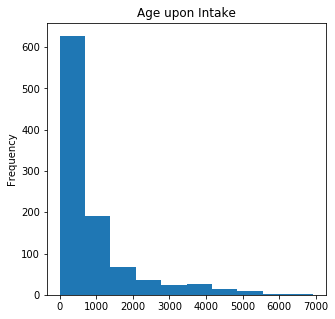

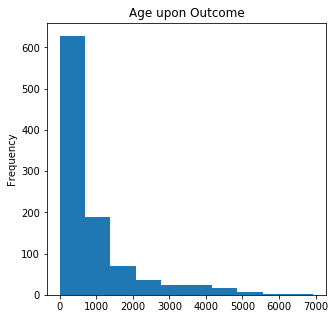

In [19]:
numeric_col=df.select_dtypes(['int64'])

pp = PdfPages('Animals_NumericFeatures_Histograms.pdf')

for col in numeric_col: 
    f = df[col].plot(kind='hist',figsize=(5,5),title=col)
    plt.show()
    pp.savefig(f.get_figure())
    
pp.close()

***- Plot box plots for all the continuous features.***

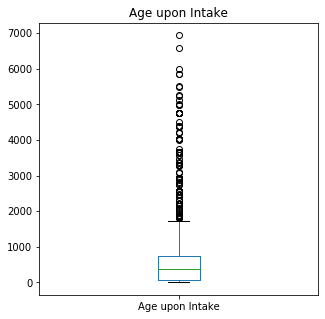

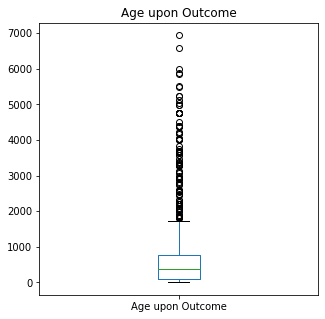

In [20]:
pp = PdfPages('Animals_NumericFeatures_Boxplots.pdf')

for col in numeric_col: 
    f = df[col].plot(kind='box',figsize=(5,5),title=col)
    plt.show()
    pp.savefig(f.get_figure())
    
pp.close()

***- Plot bar plots for all the categorical features.***

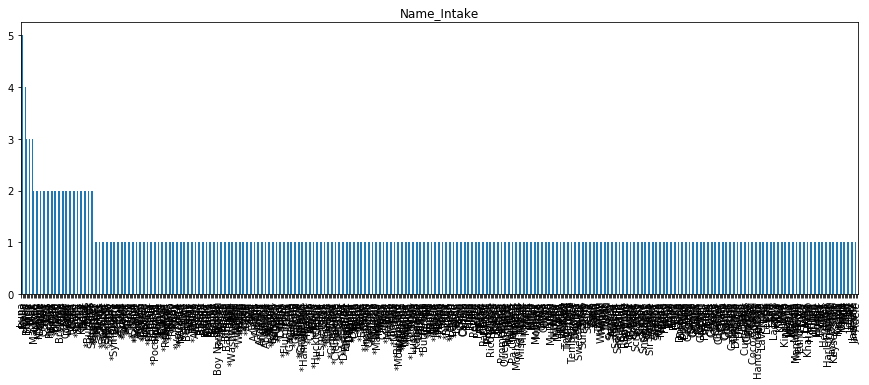

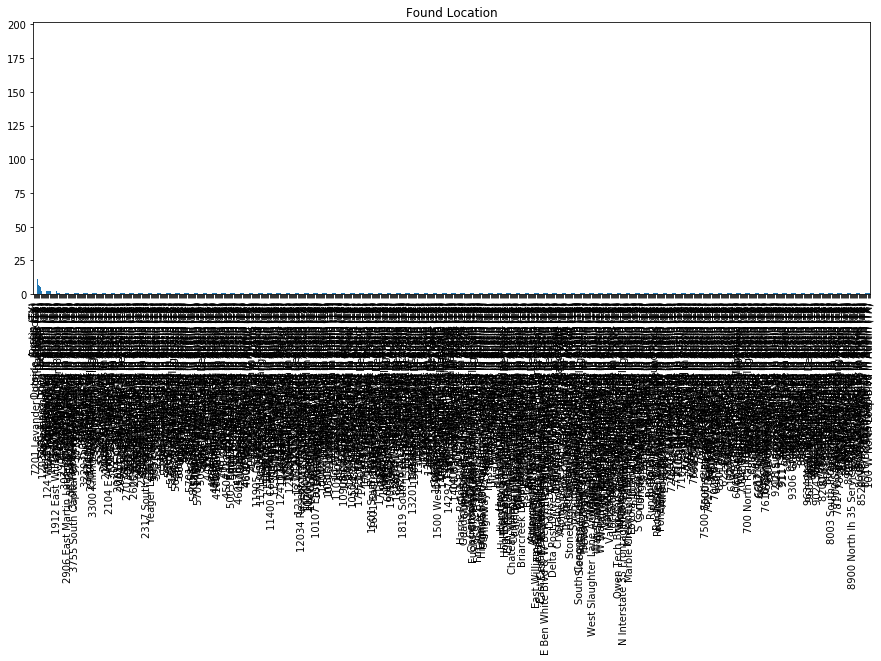

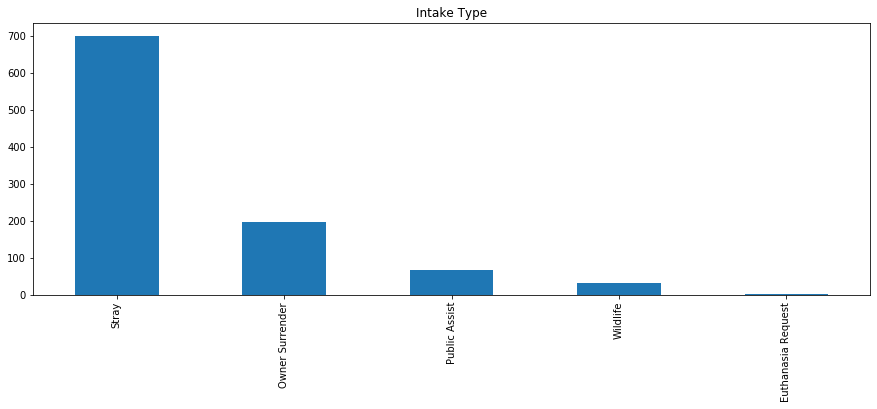

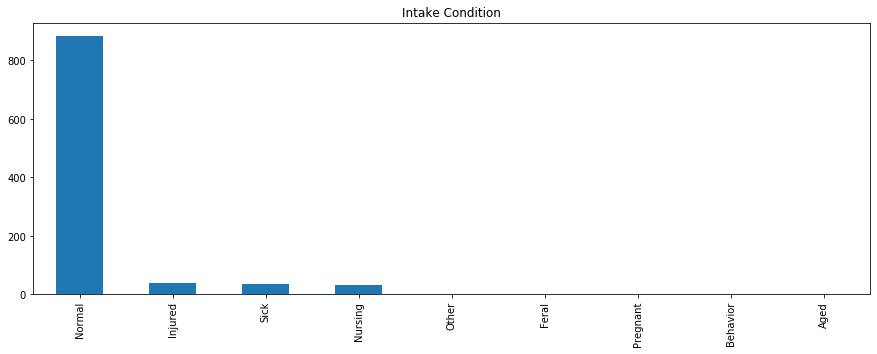

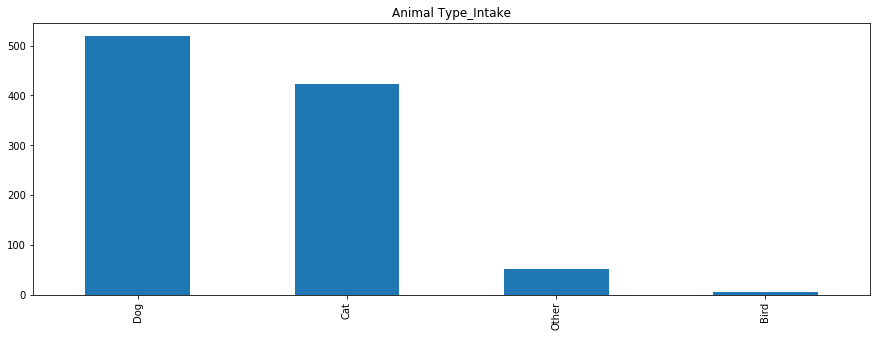

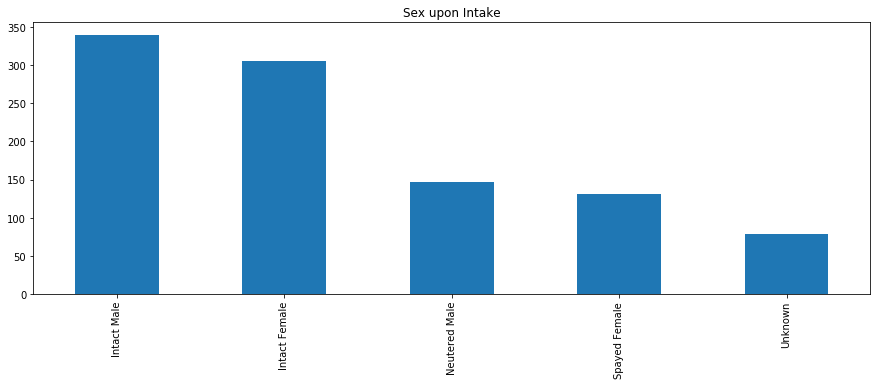

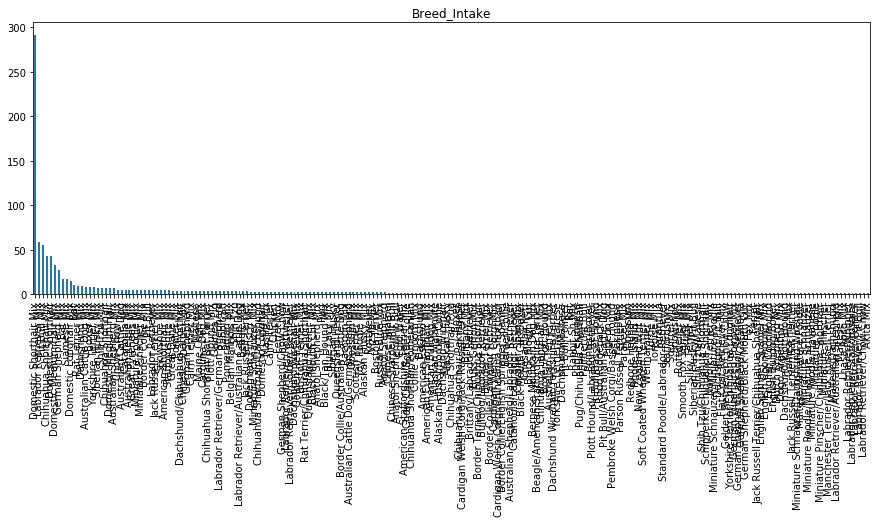

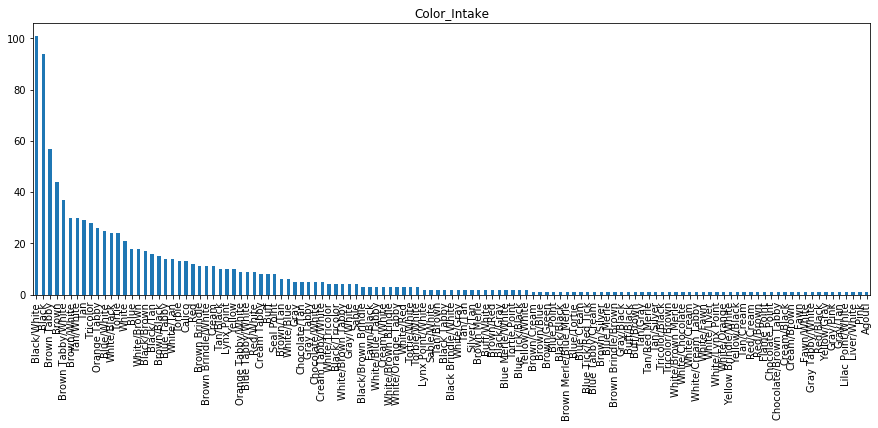

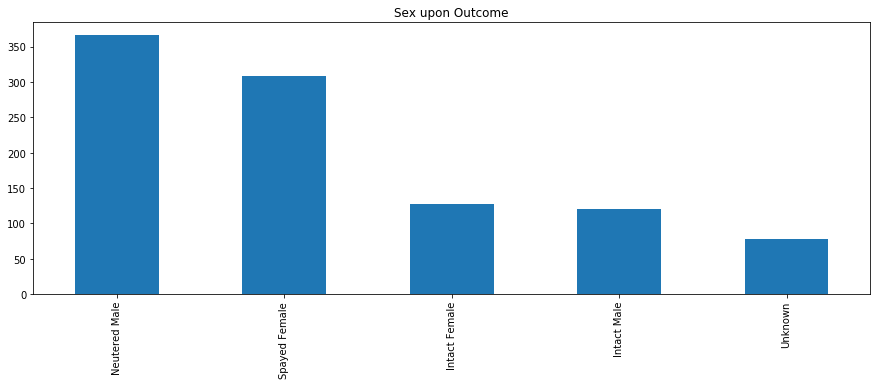

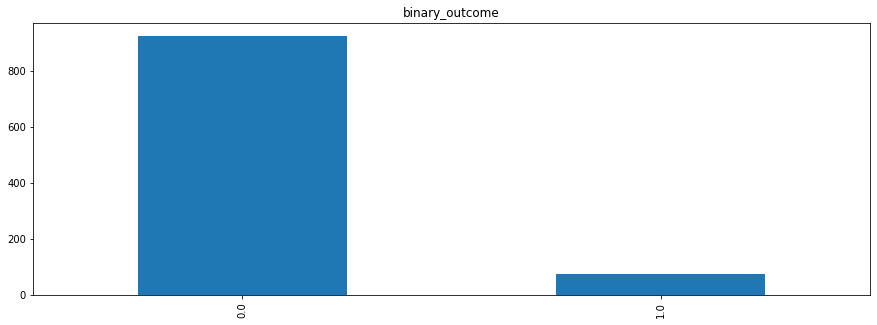

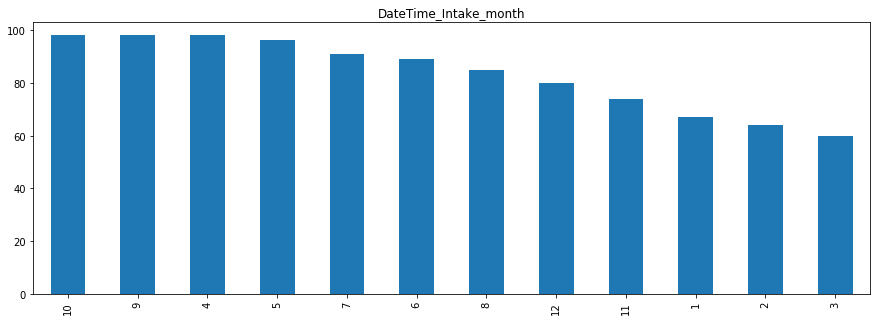

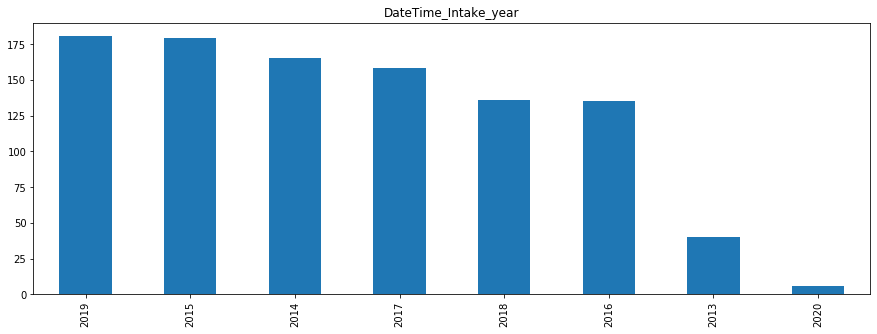

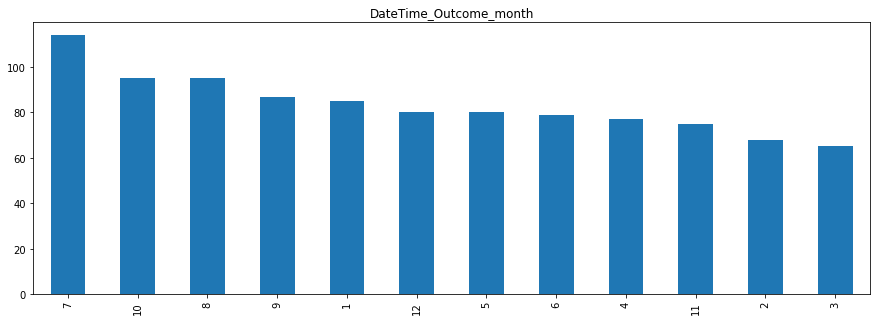

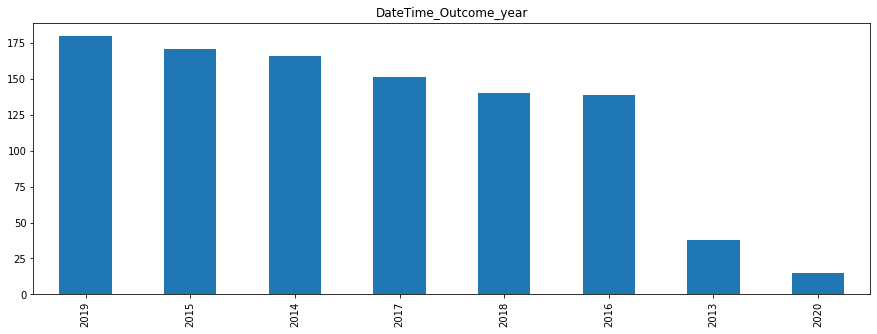

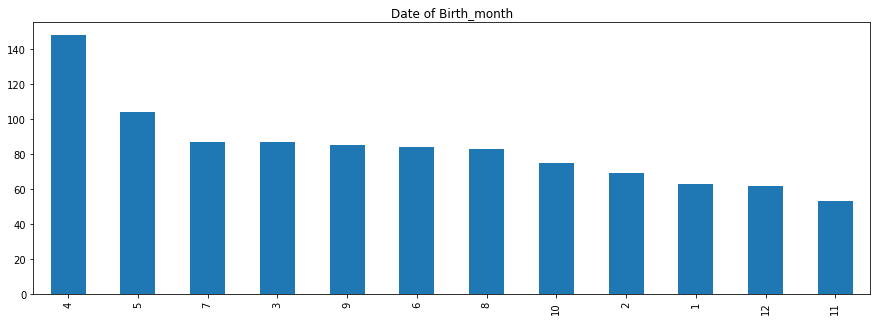

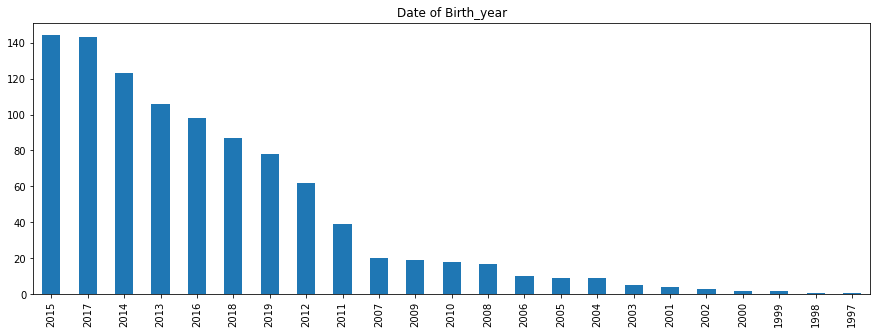

In [21]:
#extraxt only continuous features
category_col = df.select_dtypes(['category'])


# Plot a barplot for categorical features
pp = PdfPages('Animals_CategoryFeatures_Bar.pdf')
    
for col in category_col: 
    f = df[col].value_counts().plot(kind='bar',figsize=(15,5),title=col)
    plt.show()
    pp.savefig(f.get_figure())
    
pp.close()

# Data quality plan 

| Numeric Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|Age upon Intake           | Special Value -2 (1%)& Outliers (High)   | Imputation& Clamp transformation             |
|Age upon Outcome           | Outliers (High)             | Clamp transformation       |


| Categorical and Object Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|Animal ID           |    Unique identifier not to be used as feature in data preparation    |    Keep to be able to link example to actual customer, but do not use for data preparation     |
|Name_Intake           | Missing Value(32.2%)             | Drop this feature    |
|Found Location           | Location Infomation Redundancy: hard to recognized the X-axis information       | Group it into several types      |
|Intake Type           | None             | Keep as it       |
|Intake Condition           | None             | Keep as it       |
|Animal Type_Intake           | None             | Keep as it       |
|Sex upon Intake           | Unknow sex situation(7.8%)           | Investigate rows where this value appears. If invalid data and only few rows affected, drop rows       |
|Breed_Intake           | Breed Type Redundancy: hard to recognized the X-axis information            | Group it into several types       |
|Color_Intake           | Color Type Redundancy: hard to recognized the X-axis information           | Group it into several types     |
|Sex upon Outcome           | Unknow sex situation(7.8%)               | Investigate rows where this value appears. If invalid data and only few rows affected, drop rows      |
|binary_outcome           | Unbalanced number of 0 and 1 (proportion of 924:76)             | Leave as is; may consider sampling strategies to balance the dataset      |
|DateTime_Intake_month           | None             | Keep as it       |
|DateTime_Intake_year         | None             | Keep as it       |
|DateTime_Outcome_month         | None             | Keep as it       |
|DateTime_Outcome_year         | None             | Keep as it       |
|Date of Birth_month          | None             | Keep as it       |
|Date of Birth_year         | None             | Keep as it       |


***Numeric Feature: Age upon Intake***

'Age upon Intake' has very high outlier values. Hence, we decided to clamp those high outliers to the 95th percentile(this is around 3573).

Moreover, the animal intake age has a special value -2, -2 can be an invalid age or it means the intake age is very small.

In [22]:
np.percentile(df['Age upon Intake'], 75)

731.0

In [23]:
Age_Intake95 = np.percentile(df['Age upon Intake'], 95)

In [24]:
Age_Intake95

3573.5499999999965

In [25]:
# Set the threshold value for the high outliers
Age_Intake95 = np.percentile(df['Age upon Intake'], 95)

# Get the index of the high outliers
high_claim_index = df['Age upon Intake'] > Age_Intake95

# Change all values above perc95 to the value of perc95
df.loc [high_claim_index, 'Age upon Intake'] = Age_Intake95

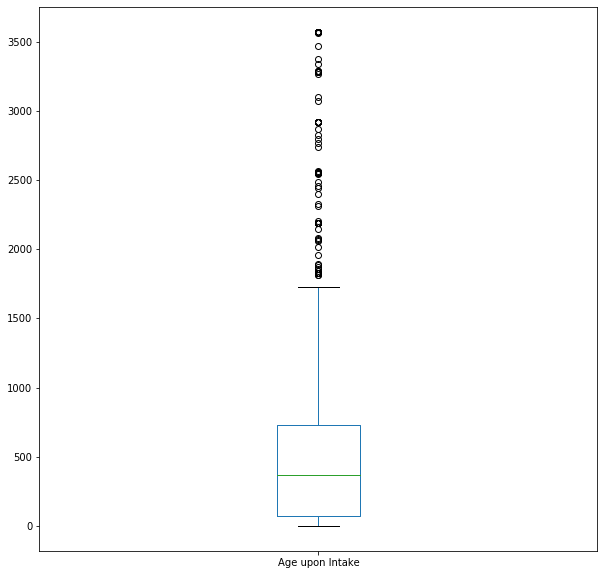

In [26]:
df['Age upon Intake'].plot(kind='box', figsize=(10,10))

The negative age seems dose not affect the value of the binary_outcome(0.0). So we consider that this animal is born in the Animal Shelter. We will replace the negative age with 0. 

In [27]:
# Look at feature Age upon Intake
df[df['Age upon Intake'] <0]

,Animal ID,Name_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,Breed_Intake,Color_Intake,Sex upon Outcome,Age upon Outcome,binary_outcome,DateTime_Intake_month,DateTime_Intake_year,DateTime_Outcome_month,DateTime_Outcome_year,Date of Birth_month,Date of Birth_year
601,A791457,*Inky,833 Fairfield Drive in Austin (TX),Stray,Normal,Cat,Intact Male,-2.0,Domestic Shorthair Mix,Black/White,Neutered Male,85,0.0,3,2019,6,2019,3,2019


In [28]:
# replace the negative value with 0
df['Age upon Intake'] = df['Age upon Intake'].replace(-2, 0)

# check the negative value is replaced or not
df[df['Age upon Intake'] < 0]

,Animal ID,Name_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,Breed_Intake,Color_Intake,Sex upon Outcome,Age upon Outcome,binary_outcome,DateTime_Intake_month,DateTime_Intake_year,DateTime_Outcome_month,DateTime_Outcome_year,Date of Birth_month,Date of Birth_year


***Numeric Feature: Age upon Outcome***

'Age upon Outcome' has very high outlier values. Hence, we decided to clamping those high outliers to the 95th percentile(this is around 3576).

In [29]:
np.percentile(df['Age upon Outcome'], 75)

773.25

In [30]:
Age_Outcome95 = np.percentile(df['Age upon Outcome'], 95)

In [31]:
Age_Outcome95 

3575.6999999999966

In [32]:
# Set the threshold value for the high outliers
Age_Outcome95 = np.percentile(df['Age upon Outcome'], 95)

# Get the index of the high outliers
high_claim_index = df['Age upon Outcome'] > Age_Outcome95

# Change all values above perc95 to the value of perc95
df.loc [high_claim_index, 'Age upon Outcome'] = Age_Outcome95

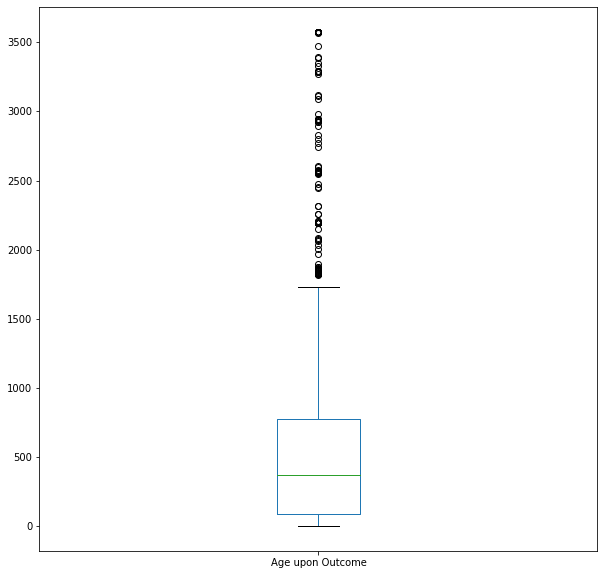

In [33]:
df['Age upon Outcome'].plot(kind='box', figsize=(10,10))

***Categorical Feature: Name_Intake***

Because the 'Name_Intake' has too many missing value and we decide to drop this feature

In [34]:
# Drop column Name_Intake
df = df.drop('Name_Intake', 1)

***Categorical Feature: Found Location***

Because the element in 'Found Location' columns is too long, and when we plotting bar graph those locations will merge and interference each other. So that, we need to modify it by extract the key word.

In [35]:
location_np = np.array(df['Found Location'])
cities = []
for location in location_np:
    words = location.split(" ")
    if (words[-2] == 'Outside'):
        cities.append(location)
    else:
        cities.append(words[-2])
        
df['Found Location'] = cities

In [36]:
# display modified locations
df['Found Location'].value_counts()

Austin                  847
Travis                   68
Manor                    23
Valle                    22
Pflugerville             17
Outside Jurisdiction     12
Leander                   3
Ridge                     2
Creedmoor                 1
Vista                     1
Hays                      1
Williamson                1
Rock                      1
Bastrop                   1
Name: Found Location, dtype: int64

***Categorical Feature: Sex upon Intake***

In [37]:
df[df['Sex upon Intake'] == 'Unknown']

,Animal ID,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,Breed_Intake,Color_Intake,Sex upon Outcome,Age upon Outcome,binary_outcome,DateTime_Intake_month,DateTime_Intake_year,DateTime_Outcome_month,DateTime_Outcome_year,Date of Birth_month,Date of Birth_year
18,A801161,Austin,Stray,Normal,Cat,Unknown,22.0,Domestic Shorthair,Black,Unknown,22.0,0.0,7,2019,7,2019,7,2019
27,A706493,Austin,Stray,Normal,Cat,Unknown,730.0,Domestic Shorthair Mix,Black,Unknown,731.0,0.0,6,2015,6,2015,6,2013
40,A708415,Austin,Stray,Normal,Cat,Unknown,22.0,Domestic Shorthair Mix,Brown Tabby,Unknown,22.0,0.0,7,2015,7,2015,7,2015
69,A808195,Austin,Wildlife,Normal,Other,Unknown,730.0,Bat,Black,Unknown,730.0,1.0,11,2019,11,2019,11,2017
93,A800102,Austin,Public Assist,Normal,Other,Unknown,365.0,Cold Water,Black,Unknown,369.0,1.0,7,2019,7,2019,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,A801567,Austin,Public Assist,Normal,Other,Unknown,365.0,Bat,Brown,Unknown,368.0,1.0,8,2019,8,2019,8,2018
963,A768862,Travis,Stray,Normal,Cat,Unknown,1.0,Domestic Shorthair Mix,Brown Tabby/White,Unknown,1.0,0.0,3,2018,3,2018,3,2018
969,A774455,Austin,Wildlife,Normal,Other,Unknown,365.0,Bat,Brown,Unknown,365.0,1.0,6,2018,6,2018,6,2017
983,A703270,Austin,Stray,Normal,Cat,Unknown,22.0,Domestic Shorthair Mix,White/Brown Tabby,Unknown,22.0,0.0,5,2015,5,2015,4,2015


In [38]:
df[df['Sex upon Intake'] == 'Unknown'].shape

(78, 18)

In [39]:
df[df['Sex upon Outcome'] == 'Unknown'].shape

(78, 18)

In [40]:
df[df['Sex upon Intake'] == 'Unknown']['Breed_Intake'].value_counts()

Domestic Shorthair Mix      28
Bat Mix                     17
Bat                         10
Domestic Shorthair           4
Domestic Medium Hair Mix     3
                            ..
Maltese/Miniature Poodle     0
Maltese/Dachshund            0
Maltese Mix                  0
Maltese                      0
Akita Mix                    0
Name: Breed_Intake, Length: 213, dtype: int64

Seems that the 'Unknown' value of feature 'Sex upon Intake' corresponds to 'Unknown' value for 'Sex upon Outcome. However, if we drop thoes rows, all 'Bat' and 'Bat Mix' will disappear and the information is lost. Hence, we decide to keep those rows contain unknow sex situation.

***Categorical Feature: Breed_Intake***

Because there are 213 kinds of intake breed, and it will be messy and hard to access the vaild information if we do not group it. 

In [41]:
test=df['Breed_Intake'].value_counts()

In [42]:
test.head(15)

Domestic Shorthair Mix       291
Labrador Retriever Mix        59
Pit Bull Mix                  55
Chihuahua Shorthair Mix       43
Domestic Shorthair            43
Domestic Medium Hair Mix      33
German Shepherd Mix           27
Bat Mix                       17
Siamese Mix                   17
Domestic Longhair Mix         15
Bat                           10
Rat Terrier Mix                9
Dachshund Mix                  9
Australian Cattle Dog Mix      8
Boxer Mix                      8
Name: Breed_Intake, dtype: int64

In [43]:
test.tail(15)

Miniature Poodle/Havanese                  1
Miniature Poodle                           1
Miniature Pinscher/Chihuahua Shorthair     1
Miniature Pinscher                         1
Manchester Terrier/Jack Russell Terrier    1
Maltese/Dachshund                          1
Labrador Retriever/Australian Shepherd     1
Maltese Mix                                1
Lhasa Apso Mix                             1
Labrador Retriever/Whippet                 1
Labrador Retriever/Staffordshire           1
Labrador Retriever/Pointer                 1
Labrador Retriever/Pit Bull                1
Labrador Retriever/Chow Chow               1
Akita Mix                                  1
Name: Breed_Intake, dtype: int64

By comparing the top 15 frequent appeared breed types and the last 15 frequent appeared breed types, we know that some breed types appear frequently and some just occur less than 10 times. So we can modify this feature by keep the frequently occured types and group the rest breed types as 'Other'.

In [44]:
top_breed =  df['Breed_Intake'].value_counts()[:9]
top_breed = top_breed.index

breed_type = np.array(df['Breed_Intake'])
breed = []
for elem in breed_type:
    if (elem  in top_breed):
        breed.append(elem)
    else:
        breed.append('Other')
        
df['Breed_Intake'] = breed

In [45]:
df['Breed_Intake'].value_counts()

Other                       415
Domestic Shorthair Mix      291
Labrador Retriever Mix       59
Pit Bull Mix                 55
Domestic Shorthair           43
Chihuahua Shorthair Mix      43
Domestic Medium Hair Mix     33
German Shepherd Mix          27
Siamese Mix                  17
Bat Mix                      17
Name: Breed_Intake, dtype: int64

***Categorical Feature: Color_Intake***

The color type is complex, some animals have two or more color and it was described using '/', for example 'black/white'. And some animal' color is described using multiple words, such as 'Brown Tabby'. Due to those cases, the 'Color_Intake' information is quite a redundancy and we can group it into a few large categories.

We first called the animal intake color is 'Mix color' if the 'Color_Intake' contains '/', then we keep the last word of the long color description string. However, the remaining color intake type is still redundant. To overcome that, we only keep the color type in which frequency is more than 10 and called the rest color type as 'Other'.

In [46]:
color_np = np.array(df['Color_Intake'])
color = []
for c in color_np:
    if ( '/' in c ):
        color.append('Mix color')
    else:    
        col = c.split(" ")
        color.append(col[-1])

df['Color_Intake'] = color

In [47]:
top_color =  df['Color_Intake'].value_counts()[16:]
top_color = top_color.index

color_type = np.array(df['Color_Intake'])
c = []
for elem in color_type:
    if (elem  in top_color):
        c.append('Other')
    else:
        c.append(elem)
        
df['Color_Intake'] = c

In [48]:
df['Color_Intake'].value_counts()

Mix color    513
Tabby        112
Black         94
Brown         44
Tan           29
Tricolor      28
Tortie        24
Other         23
Point         23
White         21
Blue          18
Calico        13
Torbie        13
Red           12
Cream         12
Brindle       11
Yellow        10
Name: Color_Intake, dtype: int64

In [49]:
df.dtypes

Animal ID                   object
Found Location              object
Intake Type               category
Intake Condition          category
Animal Type_Intake        category
Sex upon Intake           category
Age upon Intake            float64
Breed_Intake                object
Color_Intake                object
Sex upon Outcome          category
Age upon Outcome           float64
binary_outcome            category
DateTime_Intake_month     category
DateTime_Intake_year      category
DateTime_Outcome_month    category
DateTime_Outcome_year     category
Date of Birth_month       category
Date of Birth_year        category
dtype: object

As we modified the 'Found Location', 'Breed_Intake' and 'Color_Intake', the type of them changed to 'object' and we need to change the data type back to category.

In [50]:
category_columns = df.select_dtypes(['object'] )
for elem in category_columns:
     df[elem] = df[elem].astype('category')

df['Animal ID'] = df['Animal ID'].astype('object')

Print table with categorical statistics

In [51]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Found Location,1000,14,Austin,847
Intake Type,1000,5,Stray,700
Intake Condition,1000,9,Normal,885
Animal Type_Intake,1000,4,Dog,520
Sex upon Intake,1000,5,Intact Male,339
Breed_Intake,1000,10,Other,415
Color_Intake,1000,17,Mix color,513
Sex upon Outcome,1000,5,Neutered Male,366
binary_outcome,1000,2,0,924
DateTime_Intake_month,1000,12,10,98


Print table with continuous statistics

In [52]:
continuous_columns = df.select_dtypes(['float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age upon Intake,1000.0,739.3925,969.105579,0.0,68.00,365.0,731.00,3573.55
Age upon Outcome,1000.0,754.7140,967.709111,1.0,91.75,369.0,773.25,3575.70


Write the cleaned dataframe to a csv file

In [53]:
df.to_csv('Animal_Q2_cleaned.csv', index=False)

# Exploring relationships between feature pairs

## Correlations for the numeric features

In [1]:

sns.set(style="white")
numeric_col=df.select_dtypes(['float64'])

# Calculate correlation of all pairs of continuous features
corr = numeric_col.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom colormap - blue and red
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,mask=mask, vmax=1,vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

NameError: name 'sns' is not defined

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


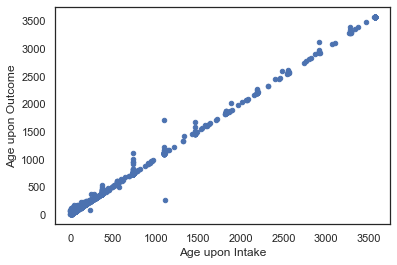

In [55]:
df.plot(kind='scatter', x='Age upon Intake', y='Age upon Outcome')

As the heatmap shows, the 'Age upon Intake' and 'Age upon Outcome' have strong correlations, as the correlation coefficient of them is 1(larger correlation coefficient means stronger possible agreement) and the 'Age upon Intake'Vs.' Age upon Outcome' shows a linear line in the scatter plot.

## Categorical vs Categorical feature plots

/Users/shuqian/anaconda3/envs/comp47350py37/lib/python3.7/site-packages/pandas/core/series.py:631: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


Found Location
Index 	 Count
Austin 	 847
Creedmoor 	 1
Travis 	 68
Leander 	 3
Pflugerville 	 17
Outside Jurisdiction 	 12
Manor 	 23
Williamson 	 1
Hays 	 1
Valle 	 22
Bastrop 	 1
Rock 	 1
Ridge 	 2
Vista 	 1


(0, 100)

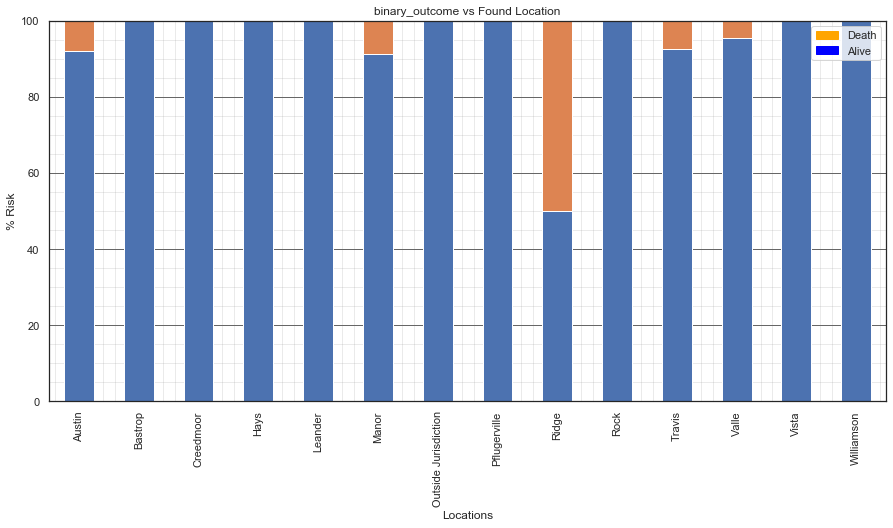

In [56]:
#Using code from the module lab
Locations = pd.unique(df['Found Location'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Found Location")
print("Index \t Count")

# for each location, print out the number of it
for i in Locations:
    
    count = df[df["Found Location"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Found Location'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Found Location','binary_outcome']].groupby(['Found Location','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Found Location", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Locations")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Found Locations against the Death Rate outcome. 

- The Death Rate in 0 when animals not been found in Ridge, Austin, Manor, Travis, and Valle.
- The Death Rate in Austin, Manor, Travis, and Valle is close and has an acceptable difference according to a different location.
- The Death Rate in Ridge has a significant increase, and it is increased to 50%.
    - This may according to the found animal type, some animal is more likely to die and those animals did not been found in other areas.


Intake Type
Index 	 Count
Public Assist 	 67
Stray 	 700
Owner Surrender 	 198
Wildlife 	 33
Euthanasia Request 	 2


(0, 100)

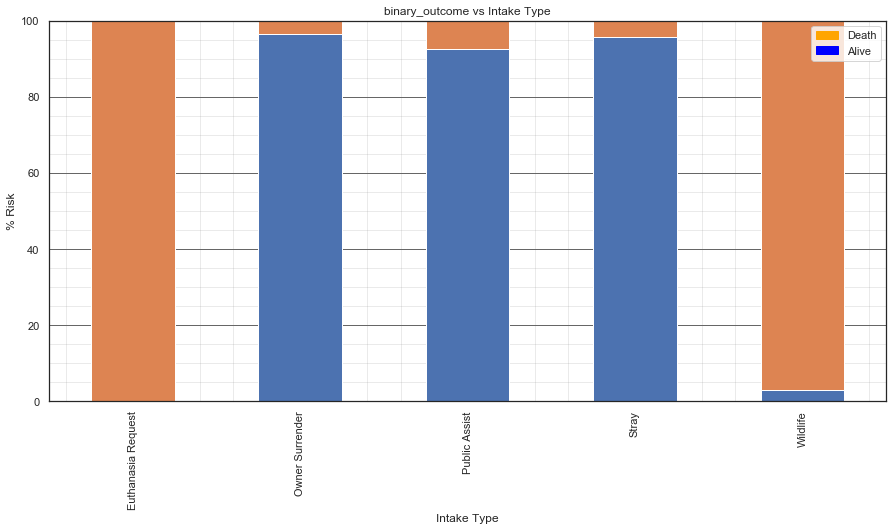

In [57]:
#Using code from the module lab
Intake_type = pd.unique(df['Intake Type'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Intake Type")
print("Index \t Count")

# for each location, print out the number of it
for i in Intake_type:
    
    count = df[df["Intake Type"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Intake Type'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Intake Type','binary_outcome']].groupby(['Intake Type','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Intake Type", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Intake Type")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Intake Type against the Death Rate outcome. 

- The Death Rates for an animal, which take to the shelter because Owner Surrender, Public Assists, and Stray are close.
- The Death Rate for public assists animals is a little higher than the owner surrender or stray.
    - The sick or ill animal may take a larger percentage in public assists animal
- The Death Rate is 100% for Euthanasia Request. Those animals may need euthanasia to relife their pain and the death rate for them is reasonable.
- Most of the Wildlife is death.
    - They may have a serious injury in the wild environment.
    - They may not get used to the new place(in the shelter) and this makes their health situation even worst.


Intake Condition
Index 	 Count
Normal 	 885
Injured 	 39
Aged 	 1
Nursing 	 31
Sick 	 37
Other 	 3
Feral 	 2
Behavior 	 1
Pregnant 	 1


(0, 100)

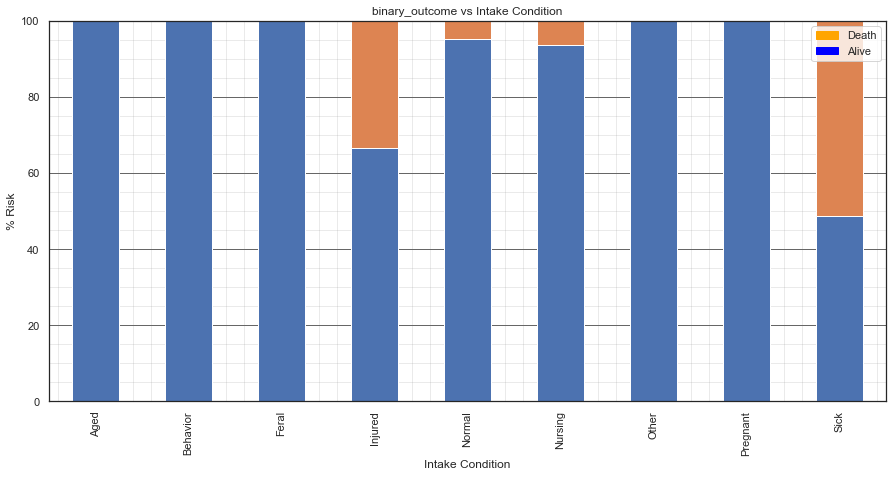

In [58]:
#Using code from the module lab
Intake_Condition = pd.unique(df['Intake Condition'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Intake Condition")
print("Index \t Count")

# for each location, print out the number of it
for i in Intake_Condition:
    
    count = df[df["Intake Condition"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Intake Condition'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Intake Condition','binary_outcome']].groupby(['Intake Condition','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Intake Condition", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Intake Condition")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Intake Condition against the Death Rate outcome. 

- The Death Rates is 0 for Aged, Other, Feral, Behavior, Pregnant animals.
- The Death Rate for the sick and injured animal is large, the death rate for the injured animal is more than 25% and for the sick animal is over 50%.
- The Death Rate for normal animals and animal which need nursing is approximately 5%.
- In summary:
    - If an animal is sick or injured, then it has a higher possibility to die.

Animal Type_Intake
Index 	 Count
Dog 	 520
Cat 	 423
Other 	 52
Bird 	 5


(0, 100)

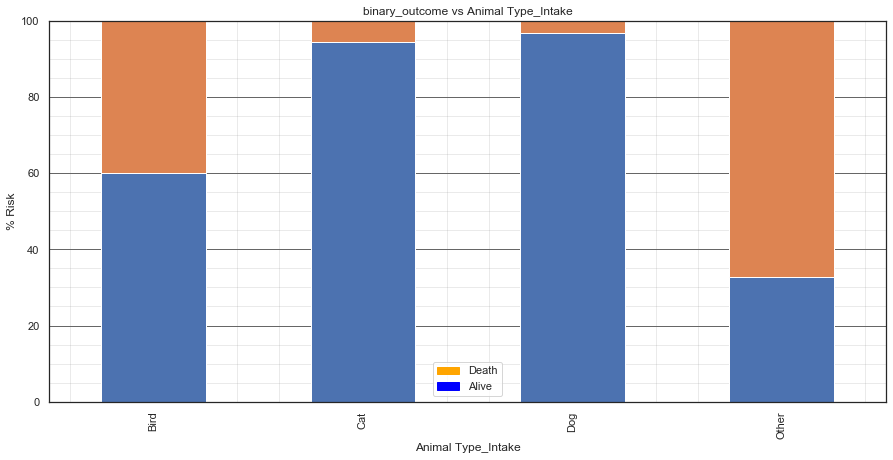

In [59]:
#Using code from the module lab
Animal_type = pd.unique(df['Animal Type_Intake'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Animal Type_Intake")
print("Index \t Count")

# for each location, print out the number of it
for i in Animal_type:
    
    count = df[df["Animal Type_Intake"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Animal Type_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Animal Type_Intake','binary_outcome']].groupby(['Animal Type_Intake','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Animal Type_Intake", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Animal Type_Intake")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Animal Type_Intake against the Death Rate outcome. 

- The Death Rates for cats and dogs are similar.
- The Death Rate for birds and other animals is large, the death rate for other animals is over 60% and for the bird is 40%.
    - The other type of animal has a large percentage of bats and mix bats.
- In summary:
    - bird and the other type of animal are more likely to die compared with cats and dogs.

Sex upon Intake
Index 	 Count
Intact Male 	 339
Intact Female 	 305
Neutered Male 	 147
Spayed Female 	 131
Unknown 	 78


(0, 100)

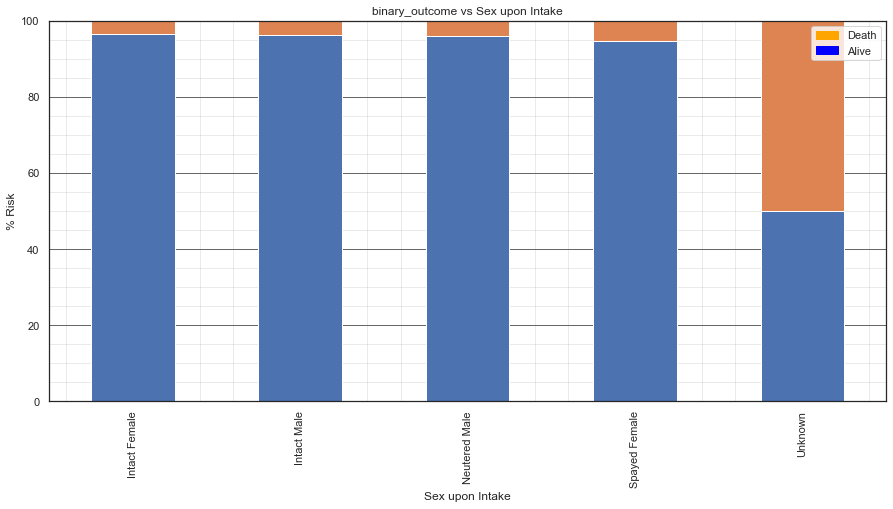

In [60]:
#Using code from the module lab
Animal_sexin = pd.unique(df['Sex upon Intake'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Sex upon Intake")
print("Index \t Count")

# for each location, print out the number of it
for i in Animal_sexin:
    
    count = df[df["Sex upon Intake"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Sex upon Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Sex upon Intake','binary_outcome']].groupby(['Sex upon Intake','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Sex upon Intake", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Sex upon Intake")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Sex upon Intake against the Death Rate outcome. 

- The Death Rates for animals who have the reproductive capacity(Intact Male and Intact Female) is the same, nearly 5%.
- The Death Rates for animals who do not have the reproductive capacity(Neutered Male and Spayed Female) are the same, nearly 5% and higher than the death rate of the animal who has the reproductive ability.
- The Death Rate for unknown sex animals is 50%, refer to the original CSV file, we know that most of the unknown sex animal are bats or mix bats.

- In summary:
    - Unknown sex animal has a 50% death rate.

Sex upon Outcome
Index 	 Count
Intact Male 	 120
Intact Female 	 127
Neutered Male 	 366
Spayed Female 	 309
Unknown 	 78


(0, 100)

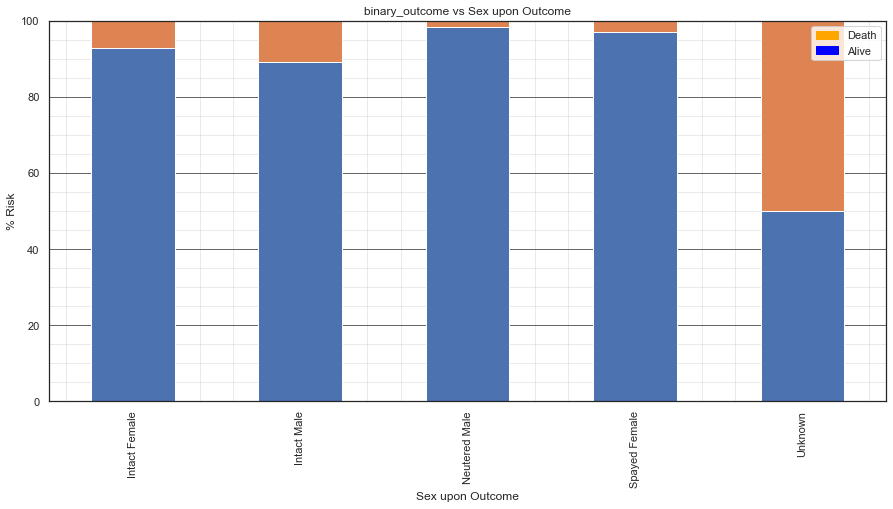

In [61]:
#Using code from the module lab
Animal_sexout = pd.unique(df['Sex upon Outcome'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Sex upon Outcome")
print("Index \t Count")

# for each location, print out the number of it
for i in Animal_sexin:
    
    count = df[df['Sex upon Outcome'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Sex upon Outcome'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Sex upon Outcome','binary_outcome']].groupby(['Sex upon Outcome','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Sex upon Outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Sex upon Outcome")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Sex upon Outcome against the Death Rate outcome. 

- The Death Rates for animals who have the reproductive capacity(Intact Male and Intact Female) is the same, about 10%.
- The Death Rates for animals who do not have the reproductive capacity(Neutered Male and Spayed Female) are the same, nearly 3% and lower than the death rate of the animal who has the reproductive ability.
- The Death Rate for unknown sex animals is 50%, refer to the original CSV file, we know that most of the unknown sex animal are bats or mix bats.

- In summary:
    - Unknown sex animal has a 50% death rate.
    - The death rate for animals does not have reproductive capacity is lower than animals have the reproductive capacity.

Breed_Intake 
Index 	 Count
Other 	 415
Domestic Shorthair Mix 	 291
Pit Bull Mix 	 55
Domestic Shorthair 	 43
German Shepherd Mix 	 27
Chihuahua Shorthair Mix 	 43
Labrador Retriever Mix 	 59
Siamese Mix 	 17
Bat Mix 	 17
Domestic Medium Hair Mix 	 33


(0, 100)

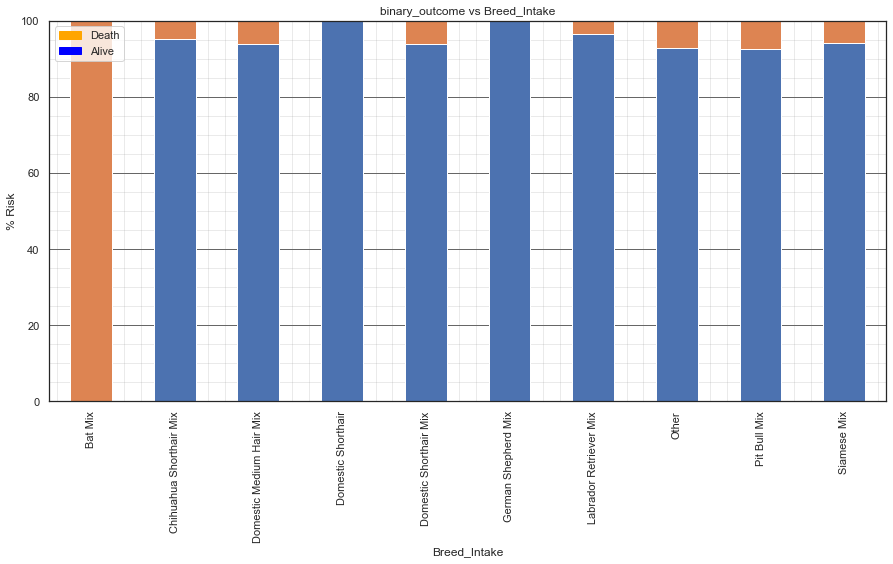

In [62]:
#Using code from the module lab
breed = pd.unique(df['Breed_Intake'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Breed_Intake ")
print("Index \t Count")

# for each location, print out the number of it
for i in breed:
    
    count = df[df['Breed_Intake'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Breed_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Breed_Intake','binary_outcome']].groupby(['Breed_Intake','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Breed_Intake", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Breed_Intake")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Breed_Intake against the Death Rate outcome. 

- The Death Rates is 100% for Bat Mix.
- The Death Rates is 0% for Domestic Shorthair and German Shepherd Mix.
- The Death Rate for the rest of the breed type animal is about 5%, which is acceptable.

- In summary:
    - If the animal breed type is Bat Mix, then it has a significantly high rate to die in the shelter.

Color_Intake 
Index 	 Count
Black 	 94
Mix color 	 513
Tabby 	 112
Tricolor 	 28
Brown 	 44
Yellow 	 10
Red 	 12
Tan 	 29
Point 	 23
Blue 	 18
Tortie 	 24
Other 	 23
Torbie 	 13
Calico 	 13
Brindle 	 11
White 	 21
Cream 	 12


(0, 100)

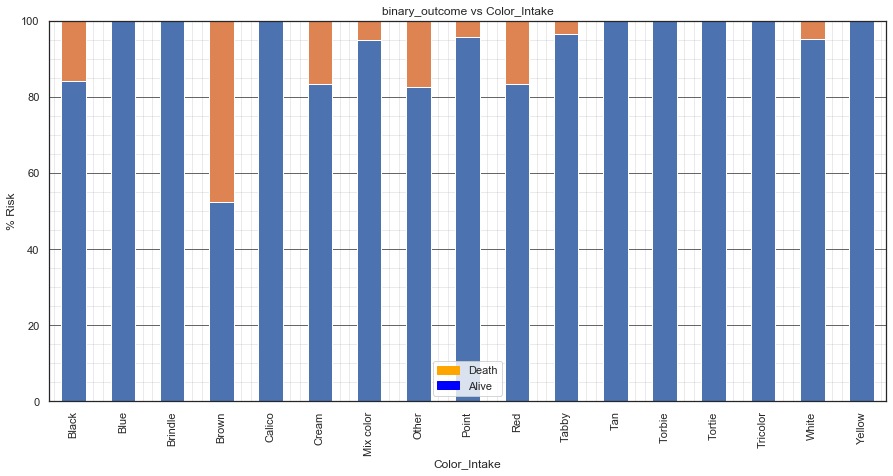

In [63]:
#Using code from the module lab
color = pd.unique(df['Color_Intake'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Color_Intake ")
print("Index \t Count")

# for each location, print out the number of it
for i in color:
    
    count = df[df['Color_Intake'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Color_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Color_Intake','binary_outcome']].groupby(['Color_Intake','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Color_Intake", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Color_Intake")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Color Intake against the Death Rate outcome. 

- The Death rate for brown animals is nearly 50%.
- The Death Rates for animals who are black, red, cream and other colors (the color that does not show in the x-axis) is nearly 16%.
- The Death Rates for animals who is mix color, tabby, point is nearly 5%.
- The animal who is rest color has the lowest death rate, 0%.

- In summary:
    - Brown animal is more likely to die.
    - The death rate black, red, cream animal is higher than the normal animal death rate.

DateTime_Intake_month 
Index 	 Count
12 	 80
8 	 85
3 	 60
10 	 98
4 	 98
5 	 96
9 	 98
2 	 64
7 	 91
6 	 89
1 	 67
11 	 74


(0, 100)

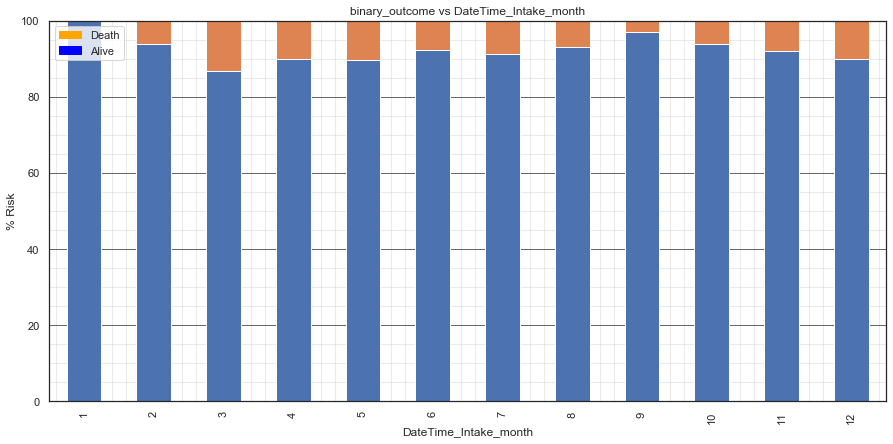

In [64]:
#Using code from the module lab
intake_month = pd.unique(df['DateTime_Intake_month'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("DateTime_Intake_month ")
print("Index \t Count")

# for each location, print out the number of it
for i in intake_month:
    
    count = df[df['DateTime_Intake_month'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['DateTime_Intake_month'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','DateTime_Intake_month','binary_outcome']].groupby(['DateTime_Intake_month','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs DateTime_Intake_month", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("DateTime_Intake_month")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for DateTime_Intake_month against the Death Rate outcome. 

- The Death Rates distribution is even for those animals who are taken into the shelter from Feb to Dec.
- The Death Rates for those animals who are taken into the shelter in Jan is the lowest, 0%.

- In summary:
    - The animal who is taken into the shelter in Jan has higher chance to be alive.

DateTime_Intake_year 
Index 	 Count
2013 	 40
2017 	 158
2019 	 181
2018 	 136
2015 	 179
2014 	 165
2016 	 135
2020 	 6


(0, 100)

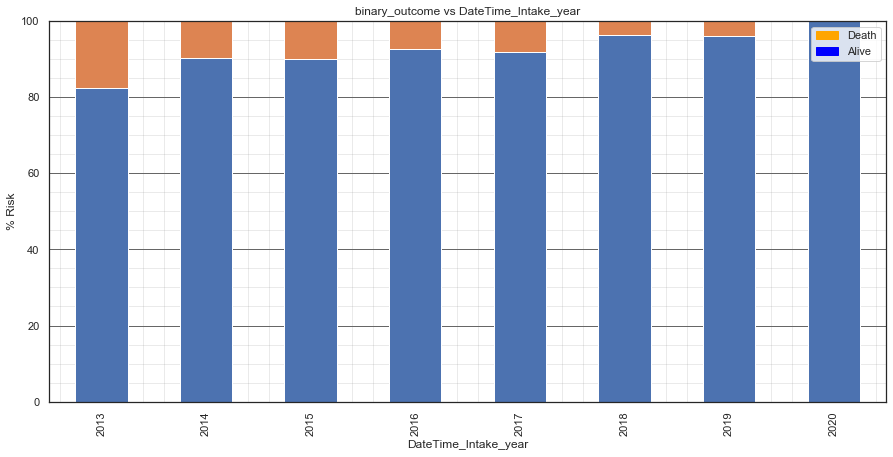

In [65]:
#Using code from the module lab
intake_year = pd.unique(df['DateTime_Intake_year'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("DateTime_Intake_year ")
print("Index \t Count")

# for each location, print out the number of it
for i in intake_year:
    
    count = df[df['DateTime_Intake_year'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['DateTime_Intake_year'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','DateTime_Intake_year','binary_outcome']].groupby(['DateTime_Intake_year','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs DateTime_Intake_year", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("DateTime_Intake_year")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for DateTime_Intake_year against the Death Rate outcome. 

- The Death Rates for animals who are taken into the shelter in 2013 is higher than in other years, it is nearly 20%
- The Death rate for animals who are taken into the shelter in 2020 is higher than in other years, it is 0%. Because 2020 is not finished yet, the animal sample might be insufficient.
- The Death Rate for the animal who is taken into the shelter between 2014 to 2019 is quite even, about 15%.

- In summary:
    - Animals who are taken into the shelter in 2013 are more likely to die than other years.

DateTime_Outcome_month 
Index 	 Count
12 	 80
8 	 95
4 	 77
10 	 95
6 	 79
5 	 80
9 	 87
2 	 68
3 	 65
11 	 75
7 	 114
1 	 85


(0, 100)

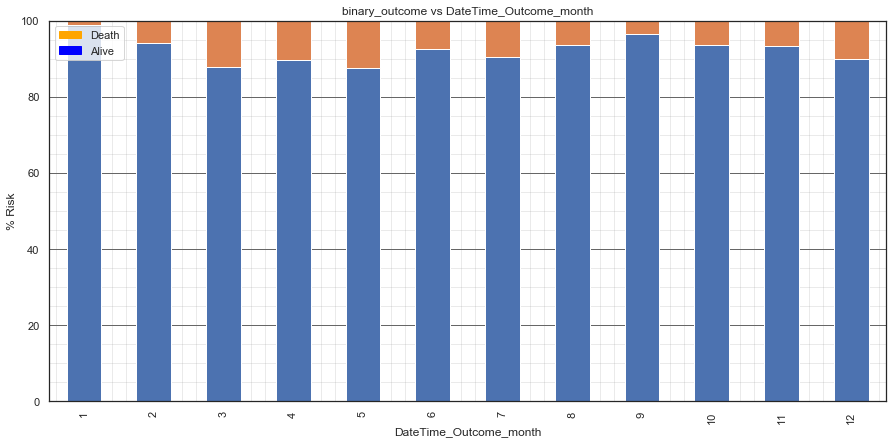

In [66]:
#Using code from the module lab
outcome_month = pd.unique(df['DateTime_Outcome_month'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("DateTime_Outcome_month ")
print("Index \t Count")

# for each location, print out the number of it
for i in outcome_month:
    
    count = df[df['DateTime_Outcome_month'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['DateTime_Outcome_month'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','DateTime_Outcome_month','binary_outcome']].groupby(['DateTime_Outcome_month','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs DateTime_Outcome_month", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("DateTime_Outcome_month")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for DateTime_Outcome_month against the Death Rate outcome. 

- The Death Rates distribution is a bit even, the difference between every animal taken out month is small.


- In summary:
    - There is no strong relevence between anmial death rate and animal taken out month.

DateTime_Outcome_year 
Index 	 Count
2013 	 38
2017 	 151
2019 	 180
2018 	 140
2015 	 171
2014 	 166
2016 	 139
2020 	 15


(0, 100)

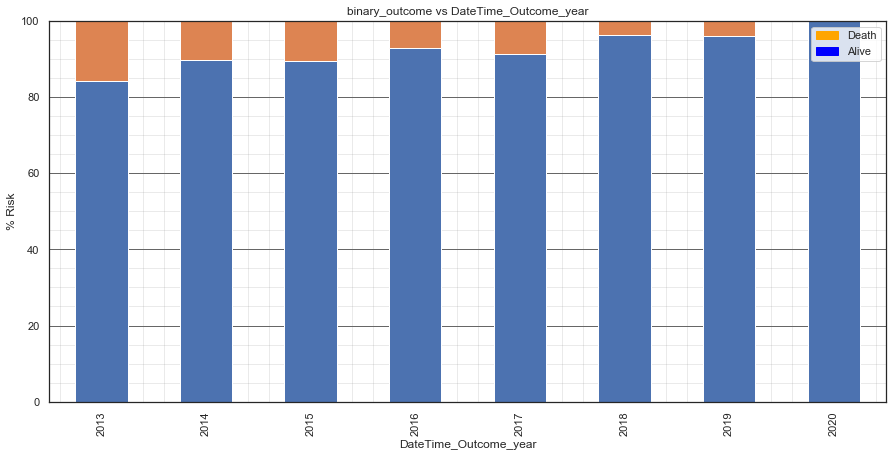

In [67]:
#Using code from the module lab
outcome_year = pd.unique(df['DateTime_Outcome_year'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("DateTime_Outcome_year ")
print("Index \t Count")

# for each location, print out the number of it
for i in outcome_year:
    
    count = df[df['DateTime_Outcome_year'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['DateTime_Outcome_year'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','DateTime_Outcome_year','binary_outcome']].groupby(['DateTime_Outcome_year','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs DateTime_Outcome_year", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("DateTime_Outcome_year")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for DateTime_Outcome_year against the Death Rate outcome. 

- The Death Rates for animals who are taken out from the shelter in 2013 is higher than in other years, it is nearly 20%
- The Death rate for animals who are taken out of the shelter in 2020 is higher than in other years, it is 0%. Because 2020 is not finished yet, the animal sample might be insufficient.
- The Death Rate for an animal who is taken out of the shelter between 2014 to 2019 is quite even, about 15%.

- In summary:
    - Animals who are taken out of the shelter in 2013 are more likely to die than other years.

Date of Birth_month 
Index 	 Count
12 	 62
5 	 104
3 	 87
10 	 75
4 	 148
9 	 85
2 	 69
8 	 83
11 	 53
6 	 84
7 	 87
1 	 63


(0, 100)

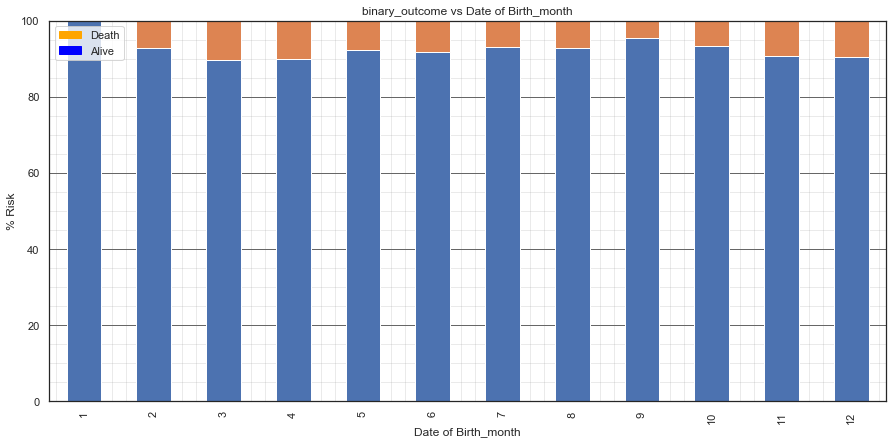

In [68]:
#Using code from the module lab
birthday_month = pd.unique(df['Date of Birth_month'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Date of Birth_month ")
print("Index \t Count")

# for each location, print out the number of it
for i in birthday_month:
    
    count = df[df['Date of Birth_month'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Date of Birth_month'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Date of Birth_month','binary_outcome']].groupby(['Date of Birth_month','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Date of Birth_month", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Date of Birth_month")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Date of Birth_month against the Death Rate outcome. 

- The Death Rates distribution(except Jan) is a bit even, the difference between every animal birth month(except Jan) is small.
- The death rate is 0% for an animal born in Jan.

- In summary:
    - The animal who is born in Jan has a higher chance to be alive.
    - The death rate for animals who born between Feb to Dec is the same.

Date of Birth_year 
Index 	 Count
2009 	 19
2017 	 143
2014 	 123
2013 	 106
2016 	 98
2012 	 62
2004 	 9
2011 	 39
2019 	 78
2018 	 87
2015 	 144
2005 	 9
2006 	 10
2003 	 5
2010 	 18
2002 	 3
2007 	 20
2008 	 17
1999 	 2
1997 	 1
1998 	 1
2001 	 4
2000 	 2


(0, 100)

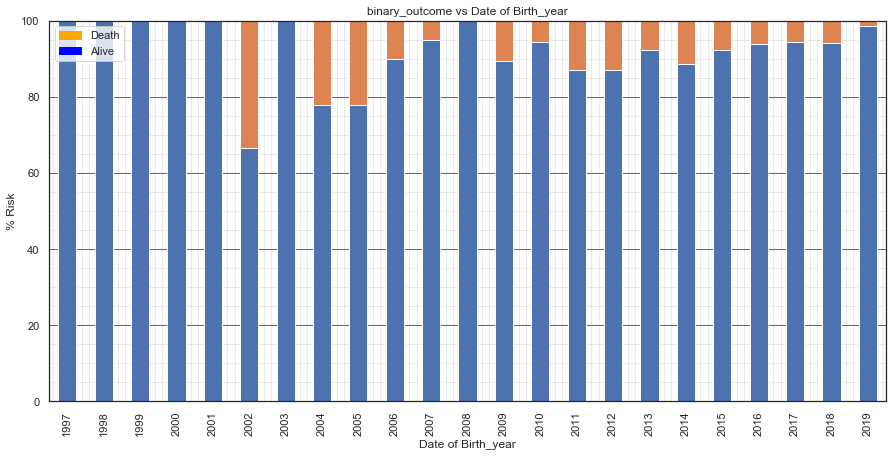

In [69]:
#Using code from the module lab
birthday_year = pd.unique(df['Date of Birth_year'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Date of Birth_year ")
print("Index \t Count")

# for each location, print out the number of it
for i in birthday_year:
    
    count = df[df['Date of Birth_year'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Date of Birth_year'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Date of Birth_year','binary_outcome']].groupby(['Date of Birth_year','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Date of Birth_year", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Date of Birth_year")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Date of Birth_year against the Death Rate outcome. 

- The Death Rates is 0% for an animal born from 1997 to 2001, 2003 and 2009.
- The Death Rate is nearly 35% for an animal born in 2002 which is high.
- Also, the death rates for an animal born in 2004 and 2005 are over 20%.
- The Death Rates from the rest year is from 5% to 15%.


- In summary:
    - The animal who is born from 1997 to 2001, 2003 and 2009 has a higher chance to be alive.
    - The animal who is born in 2002, 2004, 2005 has a higher chance to die than another year.

## Continuous-categorical feature plots

<Figure size 432x288 with 0 Axes>

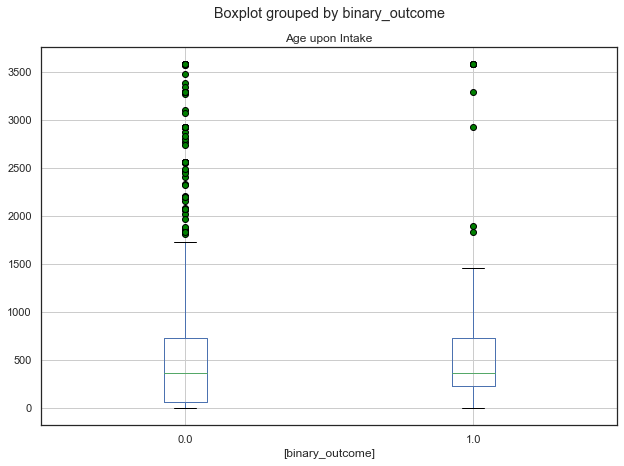

In [70]:
# 1.0 --- death
# 0.0 --- alive

plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Age upon Intake'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))


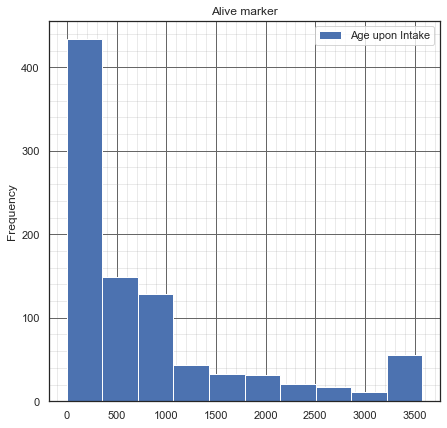

In [71]:
df[df['binary_outcome'] == 0.0][['Age upon Intake']].plot(kind='hist',figsize=(7,7), bins=10, title="Alive marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

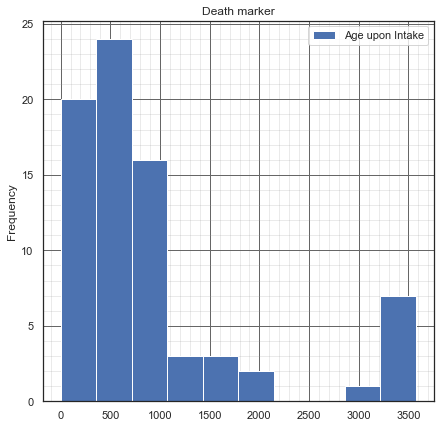

In [72]:
df[df['binary_outcome'] == 1.0][['Age upon Intake']].plot(kind='hist',figsize=(7,7), bins=10, title="Death marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

  - We can see from the above histograms that there is significantly lager animal intake age have a bad outcome  
  - We can see from the above box plots that the median values for a bad outcome and good outcome is very close 
  - We can conclude that the age upon intake has influence the outcome but it is not directly related to the animal outcome.

<Figure size 432x288 with 0 Axes>

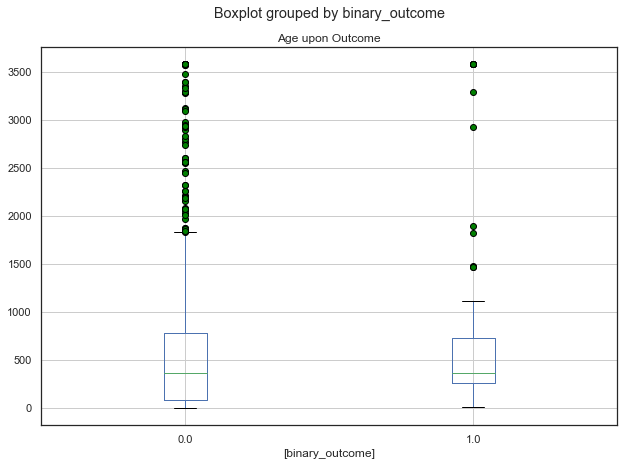

In [73]:
# 1.0 --- death
# 0.0 --- alive

plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Age upon Outcome'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))


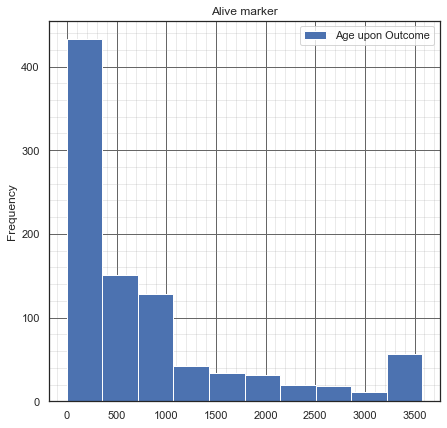

In [74]:
df[df['binary_outcome'] == 0.0][['Age upon Outcome']].plot(kind='hist',figsize=(7,7), bins=10, title="Alive marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

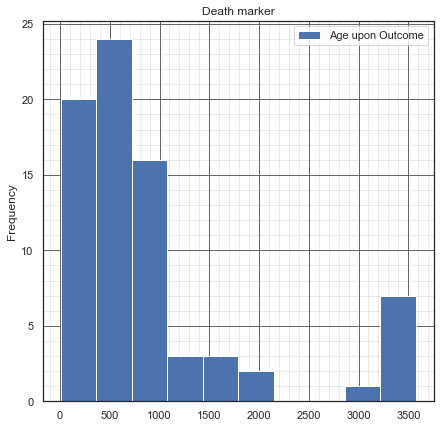

In [75]:
df[df['binary_outcome'] == 1.0][['Age upon Outcome']].plot(kind='hist',figsize=(7,7), bins=10, title="Death marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

  - According to the heatmap, we know that, the age upon intake and age upon outcome has linear relationship. Hence the histograms and box plots of them has similar pattern.
  - We can see from the above histograms that there is significantly lager animal outcome age have a bad outcome  
  - We can see from the above box plots that the median values for a bad outcome and good outcome is very close 
  - We can conclude that the age upon outcome has influence the outcome but it is not directly related to the animal outcome.

# Transform, extend or combine the existing features to create a few new features (at least 3)

***New Feature 1***

- binary_outcome: Describe the final situation of an animal using binary representation
- To be more readable, if an animal dead the outcome decribrition can be 'Death' rather than 1.0
- Therefore it is makes sense to modify this feature with 'Death' and 'Alive'

In [76]:
df['binary_outcome'] = df['binary_outcome'].replace([1.0], 'Death')
df['binary_outcome'] = df['binary_outcome'].replace([0.0], 'Alive')

<Figure size 432x288 with 0 Axes>

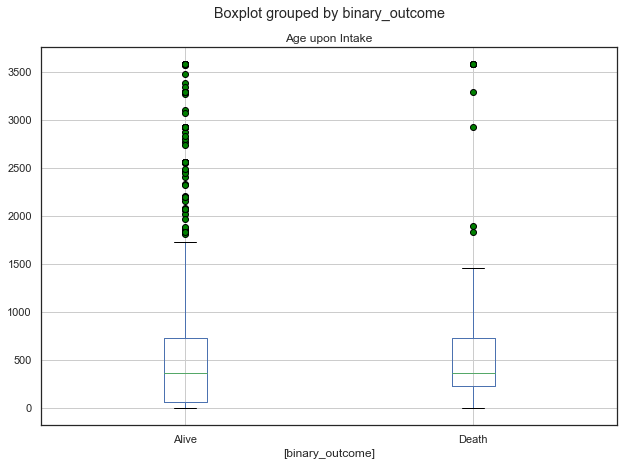

In [77]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Age upon Intake'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))

***New Feature 2***

- Day_in_shelter: Measures days per animal stay in the shelter
- This could demostrate the relationship between animal final situation and the days they stay in shelter more vivid.
- Also, this feature can help us to explore some potential issue may exist

In [78]:
df['Day_in_shelter'] = df['Age upon Outcome']  - df['Age upon Intake']

In [79]:
# Look at feature Day_in_shelter
df[df['Day_in_shelter'] <0]

,Animal ID,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,Breed_Intake,Color_Intake,Sex upon Outcome,Age upon Outcome,binary_outcome,DateTime_Intake_month,DateTime_Intake_year,DateTime_Outcome_month,DateTime_Outcome_year,Date of Birth_month,Date of Birth_year,percent,Day_in_shelter
55,A778653,Travis,Owner Surrender,Normal,Dog,Spayed Female,2325.0,Pit Bull Mix,Mix color,Spayed Female,2319.0,Alive,12,2018,12,2018,8,2012,1.612903,-6.0
173,A726552,Austin,Owner Surrender,Normal,Dog,Spayed Female,935.0,Pit Bull Mix,Tan,Spayed Female,927.0,Alive,12,2017,11,2017,5,2015,0.694444,-8.0
666,A663868,Austin,Stray,Normal,Dog,Neutered Male,1107.0,Other,Mix color,Neutered Male,261.0,Alive,2,2016,10,2013,1,2013,0.943396,-846.0
727,A690543,Outside Jurisdiction,Stray,Normal,Dog,Spayed Female,412.0,Pit Bull Mix,Mix color,Spayed Female,411.0,Alive,12,2014,12,2014,10,2013,0.943396,-1.0
779,A705183,Outside Jurisdiction,Owner Surrender,Normal,Dog,Neutered Male,565.0,Pit Bull Mix,Mix color,Neutered Male,488.0,Alive,12,2015,10,2015,6,2014,0.813008,-77.0
918,A683596,Travis,Stray,Injured,Cat,Spayed Female,231.0,Other,Tabby,Spayed Female,72.0,Alive,12,2014,7,2014,5,2014,0.813008,-159.0


This feature have some negative value and the smallest value is (-846), we consider those negative value as human error. The recoder may wrote DateTime_Intake and DateTime_Outcome backwards when he/she process those rows. Hence, we can filp those negative value to positive. 

Also we swap the value of 'Age upon Intake' and 'Age upon Outcome' as they are recorded backwards.

In [80]:
df[df['Day_in_shelter'] <0].index
for i in df[df['Day_in_shelter'] <0].index:
    temp=df['Age upon Outcome'][i]
    df['Age upon Outcome'][i]=df['Age upon Intake'][i]
    df['Age upon Intake'][i]=temp

/Users/shuqian/anaconda3/envs/comp47350py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/shuqian/anaconda3/envs/comp47350py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [81]:
df['Day_in_shelter'] = df['Day_in_shelter'].abs()
df[df['Day_in_shelter'] <0]

,Animal ID,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,Breed_Intake,Color_Intake,Sex upon Outcome,Age upon Outcome,binary_outcome,DateTime_Intake_month,DateTime_Intake_year,DateTime_Outcome_month,DateTime_Outcome_year,Date of Birth_month,Date of Birth_year,percent,Day_in_shelter


<Figure size 432x288 with 0 Axes>

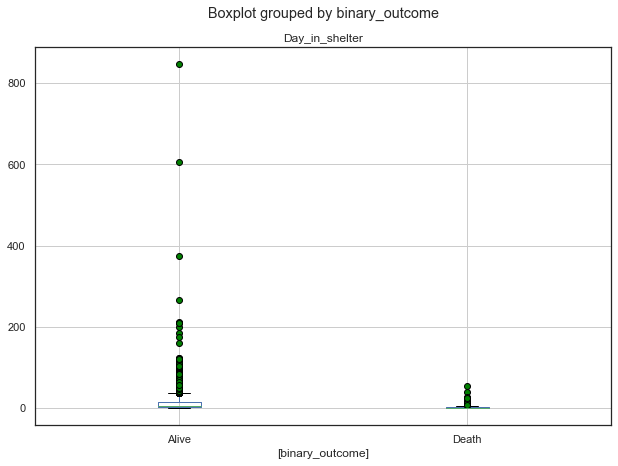

In [82]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Day_in_shelter'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))

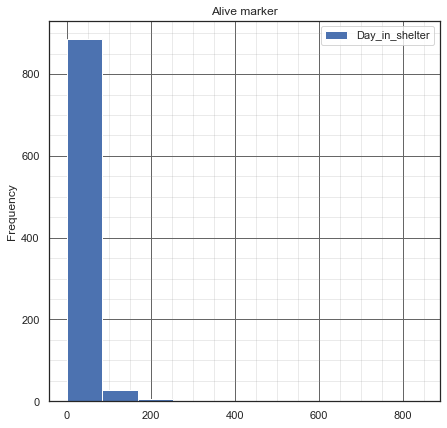

In [83]:
df[df['binary_outcome'] == 'Alive'][['Day_in_shelter']].plot(kind='hist',figsize=(7,7), bins=10, title="Alive marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

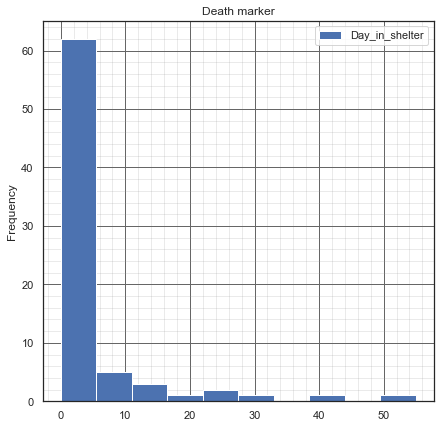

In [84]:
df[df['binary_outcome'] == 'Death'][['Day_in_shelter']].plot(kind='hist',figsize=(7,7), bins=10, title="Death marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

***New Feature 3***

- Reproduction_ability: Describe the ability of reproduction per animal
- From analysis of the data if an animal does not have the reproduction ability, the reason for that is not so important
- Therefore it is makes sense to derive a feature with a binary outcome, the animal has the reproduction ability or not

In [85]:
Sex_Out= np.array(df['Sex upon Outcome'])
sexout = []
for sex in Sex_Out:
    if ('Intact' in sex):
        sexout.append('Yes')
    elif ('Unknown' in sex):
        sexout.append('Unknown')        
    else:
        sexout.append('No')
        
df['Reproduction_ability'] = sexout

Reproduction_ability
Index 	 Count
Yes 	 247
No 	 675
Unknown 	 78


(0, 100)

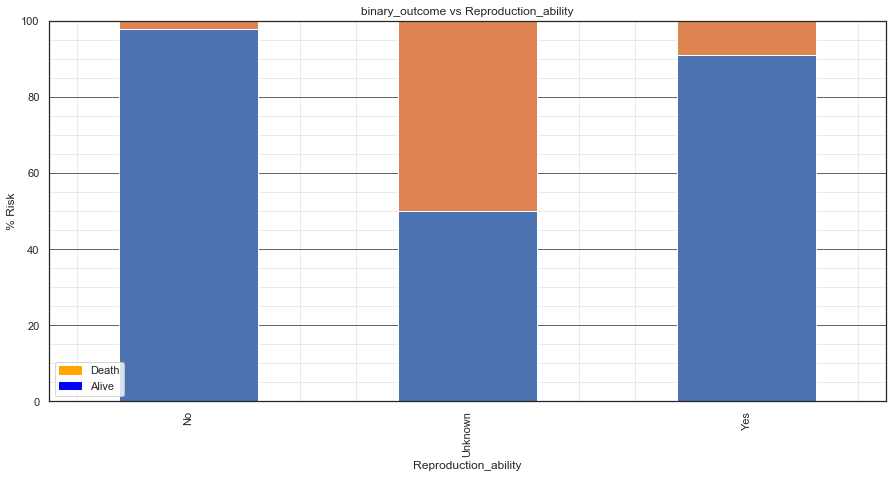

In [86]:
#Using code from the module lab
Animal_sexout = pd.unique(df['Reproduction_ability'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("Reproduction_ability")
print("Index \t Count")

# for each location, print out the number of it
for i in Animal_sexout:
    
    count = df[df['Reproduction_ability'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Reproduction_ability'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Reproduction_ability','binary_outcome']].groupby(['Reproduction_ability','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Reproduction_ability", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Reproduction_ability")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

***New Feature 4***

- health_Situation: Describe the health situation of an animal
- This feature shows the animal health situation when they take in to the shelter. It can be deriven from 'Intake Condition', if the intak condition is 'Sick' or 'Injured' we can group those two into 'unhealthy'. Other conditions can be regard as healthy as they do not have any pathological changes.
- Therefore it is makes sense to deepin the relationship between animal outcome and their health situation.

In [87]:
health_np = np.array(df['Intake Condition'])
health = []
for h in health_np:
    if ( 'Sick' in h ) or ('Injured' in h):
        health.append('Unhealthy')
    else:    
        health.append('Healthy')

df['health_Situation'] = health

health_Situation 
Index 	 Count
Healthy 	 924
Unhealthy 	 76


(0, 100)

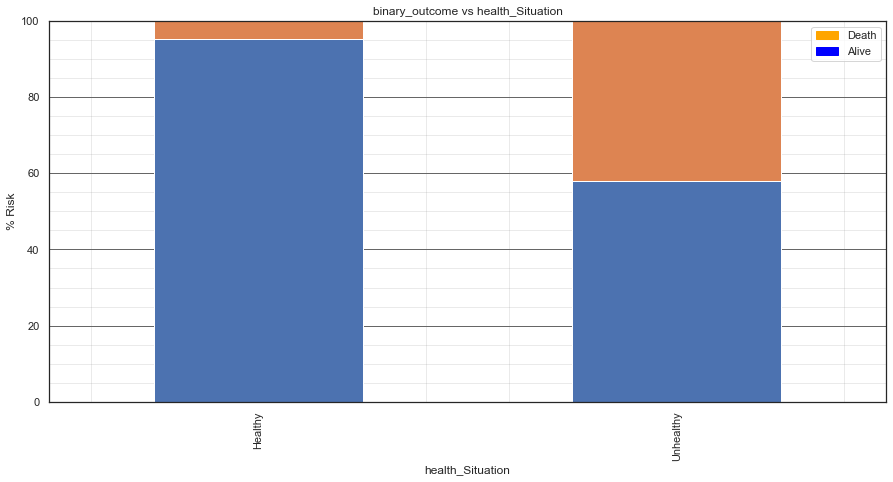

In [88]:
#Using code from the module lab
breed = pd.unique(df['health_Situation'].ravel())

# add new column and set values to zero
df['percent'] = 0


print("health_Situation ")
print("Index \t Count")

# for each location, print out the number of it
for i in breed:
    
    count = df[df['health_Situation'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['health_Situation'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','health_Situation','binary_outcome']].groupby(['health_Situation','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs health_Situation", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Death')
blue_patch = mpatches.Patch(color='blue', label='Alive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("health_Situation")
my_plot.set_ylabel("% Risk")
my_plot.set_ylim([0,100])

In [89]:
df.dtypes

Animal ID                   object
Found Location            category
Intake Type               category
Intake Condition          category
Animal Type_Intake        category
Sex upon Intake           category
Age upon Intake            float64
Breed_Intake              category
Color_Intake              category
Sex upon Outcome          category
Age upon Outcome           float64
binary_outcome              object
DateTime_Intake_month     category
DateTime_Intake_year      category
DateTime_Outcome_month    category
DateTime_Outcome_year     category
Date of Birth_month       category
Date of Birth_year        category
percent                    float64
Day_in_shelter             float64
Reproduction_ability        object
health_Situation            object
dtype: object

In [90]:
df = df.drop('percent', 1)

category_columns = df.select_dtypes(['object'] )
for elem in category_columns:
     df[elem] = df[elem].astype('category')

df['Animal ID'] = df['Animal ID'].astype('object')

In [91]:
df.dtypes

Animal ID                   object
Found Location            category
Intake Type               category
Intake Condition          category
Animal Type_Intake        category
Sex upon Intake           category
Age upon Intake            float64
Breed_Intake              category
Color_Intake              category
Sex upon Outcome          category
Age upon Outcome           float64
binary_outcome            category
DateTime_Intake_month     category
DateTime_Intake_year      category
DateTime_Outcome_month    category
DateTime_Outcome_year     category
Date of Birth_month       category
Date of Birth_year        category
Day_in_shelter             float64
Reproduction_ability      category
health_Situation          category
dtype: object

***Print final continuous statistics***

In [92]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['int64','float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age upon Intake,1000.0,738.2955,969.255781,0.0,68.0,365.0,731.00,3573.55
Age upon Outcome,1000.0,755.8110,967.540035,1.0,92.0,369.0,778.75,3575.70
Day_in_shelter,1000.0,17.5155,44.149151,0.0,2.0,5.0,15.00,846.00


***Print final categorical statistics***

In [93]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Found Location,1000,14,Austin,847
Intake Type,1000,5,Stray,700
Intake Condition,1000,9,Normal,885
Animal Type_Intake,1000,4,Dog,520
Sex upon Intake,1000,5,Intact Male,339
Breed_Intake,1000,10,Other,415
Color_Intake,1000,17,Mix color,513
Sex upon Outcome,1000,5,Neutered Male,366
binary_outcome,1000,2,Alive,924
DateTime_Intake_month,1000,12,10,98


***Write the cleaned dataframe to a csv file***

In [94]:
df.to_csv('Animal_cleaned_new_features.csv', index=False)